In [5]:
import numpy as np
import pandas as pd
from datetime import datetime


import requests
import time
import json
import ast

from collections import Counter
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from scipy.stats import gaussian_kde
from scipy.spatial.distance import euclidean

import warnings

# FutureWarning 무시 설정
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# MAPPING ITEM

In [1]:
# 로그에따라 아이템 값 이름이 달라서 통일시켜주어야 한다.

mapping = {
    'Item_Weapon_M16A4_C': 'WeapM16A4_C',
    'Item_Weapon_HK416_C': 'WeapHK416_C',
    'Item_Weapon_AK47_C': 'WeapAK47_C',
    'Item_Weapon_SCAR-L_C': 'WeapSCAR-L_C',
    'Item_Weapon_G36C_C': 'WeapG36C_C',  # Not present in the second list
    'Item_Weapon_BerylM762_C': 'WeapBerylM762_C',
    'Item_Weapon_QBZ95_C': 'WeapQBZ95_C',
    'Item_Weapon_Mk47Mutant_C': 'WeapMk47Mutant_C',
    'Item_Weapon_AUG_C': 'WeapAUG_C',
    'Item_Weapon_Groza_C': 'WeapGroza_C',
    'Item_Weapon_ACE32_C': 'WeapACE32_C',
    'Item_Weapon_FAMASG2_C': 'WeapFamasG2_C',
    'Item_Weapon_K2_C': 'WeapK2_C',
    'Item_Weapon_Mini14_C': 'WeapMini14_C',
    'Item_Weapon_SKS_C': 'WeapSKS_C',
    'Item_Weapon_Mk14_C': 'WeapMk14_C',
    'Item_Weapon_Mk12_C': 'WeapMk12_C',
    'Item_Weapon_SLR_C': 'WeapSLR_C',  # Not present in the second list
    'Item_Weapon_QBU88_C': 'WeapQBU88_C',
    'Item_Weapon_VSS_C': 'WeapVSS_C',
    'Item_Weapon_Dragunov_C': 'WeapDragunov_C',
    'Item_Weapon_FNFal_C': 'WeapFNFal_C',
    'Item_Weapon_UZI_C': 'WeapUZI_C',
    'Item_Weapon_Vector_C': 'WeapVector_C',
    'Item_Weapon_UMP_C': 'WeapUMP_C',
    'Item_Weapon_TommyGun_C': 'WeapTommyGun_C',  # Not present in the second list
    'Item_Weapon_Thompson_C': 'WeapThompson_C',
    'Item_Weapon_Thompson_Old_C': 'WeapThompson_old_C',
    'Item_Weapon_PP19Bizon_C': 'WeapPP19Bizon_C',  # Not present in the second list
    'Item_Weapon_MP5K_C': 'WeapMP5K_C',  # Not present in the second list
    'Item_Weapon_P90_C': 'WeapP90_C',
    'Item_Weapon_JS9_C': 'WeapJS9_C',
    'Item_Weapon_BizonPP19_C': 'WeapBizonPP19_C',
    'Item_Weapon_vz61Skorpion_C': 'Weapvz61Skorpion_C',
    'Item_Weapon_S686_C': 'WeapS686_C',  # Not present in the second list
    'Item_Weapon_S1897_C': 'WeapS1897_C',  # Not present in the second list
    'Item_Weapon_S12K_C': 'WeapS12K_C',  # Not present in the second list
    'Item_Weapon_DP12_C': 'WeapDP12_C',
    'Item_Weapon_SawedOff_C': 'WeapSawnoff_C',
    'Item_Weapon_Saiga12_C': 'WeapSaiga12_C',
    'Item_Weapon_Berreta686_C': 'WeapBerreta686_C',
    'Item_Weapon_AWM_C': 'WeapAWM_C',
    'Item_Weapon_M24_C': 'WeapM24_C',
    'Item_Weapon_Kar98k_C': 'WeapKar98k_C',
    'Item_Weapon_Win94_C': 'WeapWinchester_C',
    'Item_Weapon_MosinNagant_C': 'WeapMosinNagant_C',
    'Item_Weapon_LynxAMR_C': 'WeapLynxAMR_C',  # Not present in the second list
    'Item_Weapon_Winchester_C': 'WeapWinchester_C',
    'Item_Weapon_Mosin_C': 'WeapMosin_C',
    'Item_Weapon_Mortar_C': 'WeapMortar_C',  # Not present in the second list
    'Item_Weapon_PanzerFaust100M_C': 'WeapPanzerFaust100M_C',  # Not present in the second list
    'Item_Weapon_Crossbow_C': 'WeapCrossbow_1_C',
    'Item_Weapon_M249_C': 'WeapM249_C',
    'Item_Weapon_DP28_C': 'WeapDP28_C',
    'Item_Weapon_MG3_C': 'WeapMG3_C',
    'Item_Weapon_G18_C': 'WeapG18_C',
    'Item_Weapon_M1911_C': 'WeapM1911_C',
    'Item_Weapon_M9_C': 'WeapM9_C',
    'Item_Weapon_Rhino_C': 'WeapRhino_C',
    'Item_Weapon_NagantM1895_C': 'WeapNagantM1895_C',
    'Item_Weapon_Deagle_C': 'WeapDeagle_C',  # Not present in the second list
    'Item_Weapon_Pan_C': 'WeapPan_C',
    'Item_Weapon_Sickle_C': 'WeapSickle_C',  # Not present in the second list
    'Item_Weapon_Machete_C': 'WeapMachete_C',  # Not present in the second list
    'Item_Weapon_Crowbar_C': 'WeapCrowbar_C',  # Not present in the second list
    'Item_Weapon_Grenade_C': 'WeapGrenade_C',  # Not present in the second list
    'Item_Weapon_Molotov_Cocktail_C': 'WeapMolotov_Cocktail_C',  # Not present in the second list
    'Item_Weapon_SmokeBomb_C': 'WeapSmokeBomb_C',  # Not present in the second list
    'Item_Weapon_StickyGrenade_C': 'WeapStickyGrenade_C',  # Not present in the second list
    'Item_Weapon_StunGrenade_C': 'WeapStunGrenade_C'  # Not present in the second list
}


item_mapping = {   # Helmets
    'Item_Head_F_01_Lv1_C': 'Helmet_Lv1',
    'Item_Head_F_02_Lv1_C': 'Helmet_Lv1',
    'Item_Head_G_01_Lv2_C': 'Helmet_Lv2',
    'Item_Head_G_02_Lv2_C': 'Helmet_Lv2',
    'Item_Head_H_01_Lv3_C': 'Helmet_Lv3',
    'Item_Head_H_02_Lv3_C': 'Helmet_Lv3',

    # Vests
    'Item_Armor_E_01_Lv1_C': 'Vest_Lv1',
    'Item_Armor_E_02_Lv1_C': 'Vest_Lv1',
    'Item_Armor_F_01_Lv2_C': 'Vest_Lv2',
    'Item_Armor_F_02_Lv2_C': 'Vest_Lv2',
    'Item_Armor_G_01_Lv3_C': 'Vest_Lv3',
    'Item_Armor_G_02_Lv3_C': 'Vest_Lv3',

    # Backpacks
    'Item_Back_E_01_Lv1_C': 'Backpack_Lv1',
    'Item_Back_E_02_Lv1_C': 'Backpack_Lv1',
    'Item_Back_F_01_Lv2_C': 'Backpack_Lv2',
    'Item_Back_F_02_Lv2_C': 'Backpack_Lv2',
    'Item_Back_G_01_Lv3_C': 'Backpack_Lv3',
    'Item_Back_G_02_Lv3_C': 'Backpack_Lv3',

    # Meds and Boosts
    'Item_Heal_Bandage_C': 'Bandage',
    'Item_Heal_FirstAid_C': 'FirstAidKit',
    'Item_Heal_MedKit_C': 'MedKit',
    'Item_Boost_EnergyDrink_C': 'EnergyDrink',
    'Item_Boost_PainKiller_C': 'Painkiller',
    'Item_Boost_AdrenalineSyringe_C': 'AdrenalineSyringe',

    # Throwables
    'Item_Weapon_Grenade_C': 'FragGrenade',
    'Item_Weapon_Molotov_C': 'MolotovCocktail',
    'Item_Weapon_SmokeBomb_C': 'SmokeGrenade',
    'Item_Weapon_FlashBang_C': 'FlashBang',

    # Melee Weapons
    'Item_Weapon_Pan_C': 'Pan',
}



# 총기 부착물 attach 아이템 변수명 맵핑

attach_mapping = {
    # Upper 주로 조준경
    'Item_Attach_Weapon_Upper_Scope6x_C': 'Scope6x',
    'Item_Attach_Weapon_Upper_Thermal_C': 'Thermal',
    'Item_Attach_Weapon_Upper_Scope3x_C': 'Scope3x',
    'Item_Attach_Weapon_Upper_CQBSS_C': 'CQBSS',
    'Item_Attach_Weapon_Upper_DotSight_01_C': 'DotSight_01',
    'Item_Attach_Weapon_Upper_ACOG_01_C': 'ACOG_01',
    'Item_Attach_Weapon_Upper_PM2_01_C': 'PM2_01',
    'Item_Attach_Weapon_Upper_Holosight_C': 'Holosight',
    'Item_Attach_Weapon_Upper_Aimpoint_C': 'Aimpoint',

    # Muzzle 총구 부분, 소음기, 소염기 등
    'Item_Attach_Weapon_Muzzle_FlashHider_Medium_C': 'FlashHider_Medium',
    'Item_Attach_Weapon_Muzzle_Suppressor_SniperRifle_C': 'Suppressor_SniperRifle',
    'Item_Attach_Weapon_Muzzle_Duckbill_C': 'Duckbill',
    'Item_Attach_Weapon_Muzzle_FlashHider_Large_C': 'FlashHider_Large',
    'Item_Attach_Weapon_Muzzle_Compensator_Medium_C': 'Compensator_Medium',
    'Item_Attach_Weapon_Muzzle_Compensator_SniperRifle_C': 'Compensator_SniperRifle',
    'Item_Attach_Weapon_Muzzle_FlashHider_SniperRifle_C': 'FlashHider_SniperRifle',
    'Item_Attach_Weapon_Muzzle_Choke_C': 'Choke',
    'Item_Attach_Weapon_Muzzle_Compensator_Large_C': 'Compensator_Large',
    'Item_Attach_Weapon_Muzzle_Suppressor_Large_C': 'Suppressor_Large',
    'Item_Attach_Weapon_Muzzle_Suppressor_Medium_C': 'Suppressor_Medium',

    # Magazine 총기의 탄창, 퀵드로우, 대용량 탄창등
    'Item_Attach_Weapon_Magazine_ExtendedQuickDraw_SniperRifle_C': 'ExtendedQuickDraw_SniperRifle',
    'Item_Attach_Weapon_Magazine_Extended_Medium_C': 'Extended_Medium',
    'Item_Attach_Weapon_Magazine_QuickDraw_Medium_C': 'QuickDraw_Medium',
    'Item_Attach_Weapon_Magazine_Extended_Large_C': 'Extended_Large',
    'Item_Attach_Weapon_Magazine_Extended_SniperRifle_C': 'Extended_SniperRifle',
    'Item_Attach_Weapon_Magazine_QuickDraw_Large_C': 'QuickDraw_Large',
    'Item_Attach_Weapon_Magazine_ExtendedQuickDraw_Medium_C': 'ExtendedQuickDraw_Medium',
    'Item_Attach_Weapon_Magazine_ExtendedQuickDraw_Large_C': 'ExtendedQuickDraw_Large',


    # SideRail ? 총기의 측면 부착물
    'Item_Attach_Weapon_SideRail_DotSight_RMR_C': 'DotSight_RMR',
    'Item_Attach_Weapon_Stock_SniperRifle_CheekPad_C': 'CheekPad_SniperRifle',
    'Item_Attach_Weapon_Stock_SniperRifle_BulletLoops_C': 'BulletLoops_SniperRifle',
    'Item_Attach_Weapon_Stock_UZI_C': 'UZI_Stock',

    # Lower 손잡이나 그립
    'Item_Attach_Weapon_Lower_ThumbGrip_C': 'ThumbGrip',
    'Item_Attach_Weapon_Lower_Foregrip_C': 'Foregrip',
    'Item_Attach_Weapon_Lower_HalfGrip_C': 'HalfGrip',
    'Item_Attach_Weapon_Lower_AngledForeGrip_C': 'AngledForeGrip',
    'Item_Attach_Weapon_Lower_LightweightForeGrip_C': 'LightweightForeGrip',
    'Item_Attach_Weapon_Lower_LaserPointer_C': 'LaserPointer',

    # Stock 총기 개머리판 ,패드?
    'Item_Attach_Weapon_Stock_AR_HeavyStock_C': 'AR_HeavyStock',
    'Item_Attach_Weapon_Stock_AR_Composite_C': 'AR_Composite',

    }

Upper = ['Scope6x', 'Thermal', 'Scope3x', 'CQBSS', 'DotSight_01', 'ACOG_01', 'PM2_01', 'Holosight', 'Aimpoint']

Muzzle= ['FlashHider_Medium', 'Suppressor_SniperRifle', 'Duckbill', 'FlashHider_Large', 'Compensator_Medium',
            'Compensator_SniperRifle', 'FlashHider_SniperRifle', 'Choke', 'Compensator_Large', 'Suppressor_Large',
            'Suppressor_Medium']

Magazine = ['ExtendedQuickDraw_SniperRifle', 'Extended_Medium', 'QuickDraw_Medium', 'Extended_Large',
              'Extended_SniperRifle', 'QuickDraw_Large', 'ExtendedQuickDraw_Medium', 'ExtendedQuickDraw_Large']

SideRail = ['DotSight_RMR', 'CheekPad_SniperRifle', 'BulletLoops_SniperRifle', 'UZI_Stock']


Lower = ['ThumbGrip', 'Foregrip', 'HalfGrip', 'AngledForeGrip', 'LightweightForeGrip', 'LaserPointer']

Stock = ['AR_HeavyStock', 'AR_Composite']


# 무기 장르 목록
AR = [
    'Item_Weapon_M16A4_C', 'Item_Weapon_HK416_C', 'Item_Weapon_AK47_C',
    'Item_Weapon_SCAR-L_C', 'Item_Weapon_G36C_C', 'Item_Weapon_BerylM762_C', 'Item_Weapon_QBZ95_C', 'Item_Weapon_Mk47Mutant_C',
    'Item_Weapon_AUG_C', 'Item_Weapon_Groza_C', 'Item_Weapon_ACE32_C', 'Item_Weapon_FAMASG2_C', 'Item_Weapon_K2_C',
    'WeapM16A4_C', 'WeapHK416_C', 'WeapAK47_C', 'WeapSCAR-L_C', 'WeapG36C_C', 'WeapBerylM762_C', 'WeapQBZ95_C', 'WeapMk47Mutant_C',
    'WeapAUG_C', 'WeapGroza_C', 'WeapACE32_C', 'WeapFamasG2_C', 'WeapK2_C'
]

DMR = [
    'Item_Weapon_Mini14_C', 'Item_Weapon_SKS_C', 'Item_Weapon_Mk14_C', 'Item_Weapon_Mk12_C', 'Item_Weapon_SLR_C',
    'Item_Weapon_QBU88_C', 'Item_Weapon_VSS_C', 'Item_Weapon_Dragunov_C', 'Item_Weapon_FNFal_C',
    'WeapMini14_C', 'WeapSKS_C', 'WeapMk14_C', 'WeapMk12_C', 'WeapSLR_C', 'WeapQBU88_C', 'WeapVSS_C', 'WeapDragunov_C', 'WeapFNFal_C'
]

SMG = [
    'Item_Weapon_UZI_C', 'Item_Weapon_Vector_C', 'Item_Weapon_UMP_C', 'Item_Weapon_TommyGun_C', 'Item_Weapon_Thompson_C', 'Item_Weapon_Thompson_Old_C',
    'Item_Weapon_PP19Bizon_C', 'Item_Weapon_MP5K_C', 'Item_Weapon_P90_C', 'Item_Weapon_JS9_C', 'Item_Weapon_BizonPP19_C', 'Item_Weapon_vz61Skorpion_C',
    'WeapUZI_C', 'WeapVector_C', 'WeapUMP_C', 'WeapTommyGun_C', 'WeapThompson_C', 'WeapThompson_old_C', 'WeapPP19Bizon_C', 'WeapMP5K_C', 'WeapP90_C', 'WeapJS9_C', 'WeapBizonPP19_C', 'Weapvz61Skorpion_C'
]

SG = [
    'Item_Weapon_S686_C', 'Item_Weapon_S1897_C', 'Item_Weapon_S12K_C', 'Item_Weapon_DP12_C', 'Item_Weapon_SawedOff_C', 'Item_Weapon_Saiga12_C', 'Item_Weapon_Berreta686_C',
    'WeapS686_C', 'WeapS1897_C', 'WeapS12K_C', 'WeapDP12_C', 'WeapSawnoff_C', 'WeapSaiga12_C', 'WeapBerreta686_C'
]

SR = [
    'Item_Weapon_AWM_C', 'Item_Weapon_M24_C', 'Item_Weapon_Kar98k_C', 'Item_Weapon_Win94_C', 'Item_Weapon_MosinNagant_C', 'Item_Weapon_LynxAMR_C', 'Item_Weapon_Winchester_C', 'Item_Weapon_Mosin_C',
    'WeapAWM_C', 'WeapM24_C', 'WeapKar98k_C', 'WeapWinchester_C', 'WeapMosinNagant_C', 'WeapLynxAMR_C', 'WeapWinchester_C', 'WeapMosin_C'
]

Special = [
    'Item_Weapon_FlareGun_C', 'Item_Weapon_Mortar_C', 'Item_Weapon_PanzerFaust100M_C', 'Item_Weapon_Ziplinegun_C', 'Item_Weapon_Crossbow_C',
    'WeapMortar_C', 'WeapPanzerFaust100M_C', 'WeapCrossbow_1_C'
]

LMG = [
    'Item_Weapon_M249_C', 'Item_Weapon_DP28_C', 'Item_Weapon_MG3_C',
    'WeapM249_C', 'WeapDP28_C', 'WeapMG3_C'
]

P = [
    'Item_Weapon_G18_C', 'Item_Weapon_M1911_C', 'Item_Weapon_M9_C', 'Item_Weapon_Rhino_C', 'Item_Weapon_NagantM1895_C', 'Item_Weapon_Deagle_C',
    'WeapG18_C', 'WeapM1911_C', 'WeapM9_C', 'WeapRhino_C', 'WeapNagantM1895_C', 'WeapDeagle_C'
]

Melee = [
    'Item_Weapon_Pan_C', 'Item_Weapon_Sickle_C', 'Item_Weapon_Machete_C', 'Item_Weapon_Crowbar_C',
    'WeapPan_C', 'WeapSickle_C', 'WeapMachete_C', 'WeapCrowbar_C'
]

Throwables = [
    'Item_Weapon_Grenade_C', 'Item_Weapon_Molotov_Cocktail_C', 'Item_Weapon_SmokeBomb_C', 'Item_Weapon_StickyGrenade_C', 'Item_Weapon_StunGrenade_C',
    'WeapGrenade_C', 'WeapMolotov_Cocktail_C', 'WeapSmokeBomb_C', 'WeapStickyGrenade_C', 'WeapStunGrenade_C'
]



In [2]:
API_URL = "https://api.pubg.com"


In [3]:
# 요청 헤더 설정
headers = {
    "Authorization": f"Bearer {API_KEY}",
    "Accept": "application/vnd.api+json"
}

# player id 별 matchid
def get_player_id(player_name):
    endpoint = f"/shards/steam/players?filter[playerNames]={player_name}"
    response = requests.get(API_URL + endpoint, headers=headers)
    if response.status_code == 200:
        data = response.json()
        if data:
            player_data = data['data'][0]
            matchids = player_data['relationships']['matches']['data']
            player_id = player_data['id']
            return player_id, matchids
        else:
            print(f"플레이어 {player_name}을 찾을 수 없습니다.")
            return None
    elif response.status_code == 429:
        print("API 요청이 너무 많습니다. 1분 동안 쉽니다.")
        time.sleep(60)  # 1분 동안 코드 실행을 지연시킵니다.
        return get_player_id(player_name)  # 재귀적으로 다시 시도합니다.
    else:
        print(f"Error: {response.status_code}")
        return None



# matchid 별 경기
def get_match_detail(match_id):
    url = 'https://api.pubg.com/shards/steam/matches/{}'
    url = url.format(match_id)
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        return None


# matchid 별로 경기 요약
# def get_match_details(match_ids):
#     all_match_details = []

#     for match_id in match_ids:
#         url = f'https://api.pubg.com/shards/steam/matches/{match_id}'
#         response = requests.get(url, headers=headers)

#         if response.status_code == 200:
#             all_match_details.append(response.json())

#         else:
#             print(f"Error: {response.status_code} for match ID {match_id}")

#     return all_match_details


#matchid 별로 경기 요약
def get_match_details(match_ids):
    all_match_details = []

    for i, match_id in enumerate(match_ids):
        url = f'https://api.pubg.com/shards/steam/matches/{match_id}'
        response = requests.get(url, headers=headers)

        if response.status_code == 200:
            all_match_details.append(response.json())
        else:
            print(f"Error: {response.status_code} for match ID {match_id}")

        # 10개마다 1분 대기
        if (i + 1) % 11 == 0:
            print("Reached 10 requests, waiting for 1 minute...")
            time.sleep(60)

    return all_match_details


# weaponMasterySummary
def get_player_weapon(player_id):
    url = f'https://api.pubg.com/shards/steam/players/{player_id}/weapon_mastery'
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        return None



# SurvivalMasterySummary
def get_player_survival(player_id):
    url = f'https://api.pubg.com/shards/steam/players/{player_id}/survival_mastery'
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        return None



def get_rank(player_id):
  #  Rank 정보를 위한
  url = f'https://api.pubg.com/shards/steam/seasons'
  response = requests.get(url, headers=headers)
  seson = response.json()
  seasonId = seson['data'][-1:][0]['id']   # 가장 최근 시즌id

  # rank
  rank_url = f'https://api.pubg.com/shards/steam/players/{player_id}/seasons/{seasonId}/ranked'
  response = requests.get(rank_url, headers=headers)
  rank = response.json()
  return rank


def load_csv_in_chunks(url,chunk_size=1000000):
    chunks = pd.read_csv(url , chunksize=chunk_size, encoding = "UTF-8")
    return pd.concat(chunks)

In [ ]:
player_name = 'VINGMINGVINGMING'
player_id, matchids = get_player_id(player_name)
matchids = [match['id'] for match in matchids]


In [ ]:
matchids = matchids[:10]

In [ ]:
match_data_vingming = get_match_details(matchids)

In [ ]:
match_data_vingming

In [ ]:
player_weapon_mastery = get_player_weapon(player_id)

# wak_weapon= pd.json_normalize(player_weapon_mastery)
weaponSummaries = player_weapon_mastery['data']['attributes']['weaponSummaries']

# Initialize a list to store the data
data = []

# Loop through each weapon and add the weapon name to the data
for weapon, stats in weaponSummaries.items():
    stats['weapon.itemid'] = weapon
    data.append(stats)

# Create the dataframe
weapon_summaries_df = pd.json_normalize(data)
columns = [col for col in weapon_summaries_df.columns if col.startswith("OfficialStatsTotal")]
cols =  ['weapon.itemid','XPTotal','LevelCurrent'] + columns
weapon_summaries_df[weapon_summaries_df['XPTotal'] > 0][cols].sort_values(by=['XPTotal'], ascending=False)

,weapon.itemid,XPTotal,LevelCurrent,OfficialStatsTotal.MostDefeatsInAGame,OfficialStatsTotal.Defeats,OfficialStatsTotal.DamagePlayer,OfficialStatsTotal.HeadShots,OfficialStatsTotal.Kills,OfficialStatsTotal.MostKillsInAGame,OfficialStatsTotal.Groggies,OfficialStatsTotal.LongestKill
16,Item_Weapon_HK416_C,248423,41,0,0,4668,30,28,3,25,59
2,Item_Weapon_AUG_C,184180,34,0,0,6565,35,50,5,44,84
24,Item_Weapon_M24_C,167951,32,0,0,5456,18,19,4,22,396
0,Item_Weapon_ACE32_C,120772,26,0,0,4514,18,34,4,30,120
1,Item_Weapon_AK47_C,100327,23,0,0,1502,6,14,4,11,43
19,Item_Weapon_Kar98k_C,94870,22,0,0,2375,8,10,2,14,255
29,Item_Weapon_Mk12_C,83606,21,0,0,3108,8,11,2,11,317
41,Item_Weapon_SKS_C,77282,20,0,0,1044,7,1,1,4,66
12,Item_Weapon_FNFal_C,62328,17,0,0,871,0,0,0,0,0
11,Item_Weapon_Dragunov_C,55294,16,0,0,1998,7,6,1,11,117


In [ ]:
rank = get_rank(player_id)
rank

In [ ]:
# match 경기
match_datas = get_match_details(plus_list)

In [ ]:
match_datas

In [ ]:
log_details = []
all_match_static = []
for i in range(len(matchids)):
    match_data = match_data_vingming[i]

    if match_data is None:
        continue  # match_datas[i]가 None인 경우 건너뜁니다.

    match_static = pd.json_normalize(match_data['included'], sep='_')
    all_match_static.append(match_static)

    # GameMode와 MapName 정보를 가져와서 DataFrame에 추가합니다.
    matchId = match_data['data']['id']
    game_mode = match_data['data']['attributes']['gameMode']
    map_name = match_data['data']['attributes']['mapName']

    # match_static DataFrame에 새로운 컬럼을 추가합니다.
    match_static['GameMode'] = game_mode
    match_static['MapName'] = map_name
    match_static['matchId'] = matchId


    # 각 asset의 URL과 관련 정보를 함께 저장합니다.
    asset_urls = match_static[match_static['type'] == 'asset']['attributes_URL'].tolist()
    for url in asset_urls:
        log_details.append({
            'url': url,
            'game_mode': game_mode,
            'map_name': map_name,
            'matchId': matchId,
        })



result = pd.concat(all_match_static, ignore_index=True)
result.columns = result.columns.str.replace('attributes_stats_', '')

In [ ]:
# 10분 이상 진행된거
wak_result =result[result['name'] ==player_name]
wak_result['timeSurvived'] = wak_result['timeSurvived'] / 60
plus_list= wak_result[wak_result['timeSurvived'] > 10]['matchId'].tolist()
plus_list

<ipython-input-53-9dc301658dd2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wak_result['timeSurvived'] = wak_result['timeSurvived'] / 60


['5200e3e0-05bb-48bc-8eba-98dc6c408d5f',
 'e68748a4-177b-48d3-bf80-4a961c23803e',
 '41da4633-9558-41fa-bc4e-4e789d4131d6',
 'ddef6c26-e51b-440c-8084-0b8a7b89adcc',
 '3212089f-4a7f-4657-ac3b-7c4a97a54b09']

In [ ]:
def get_details(log_details):
  all_logs = []
  for i, detail in enumerate(log_details):
      url = detail['url']
      response = requests.get(url, headers=headers)
      if response.status_code == 200:
          logs = response.json()
          df = pd.json_normalize(logs)
          df['GameMode'] = detail['game_mode']
          df['MapName'] = detail['map_name']
          df['matchId'] = detail['matchId']
          all_logs.append(df)
      else:
          print(f"Failed to fetch data from {url}: {response.status_code}")

      # 10개마다 1분 대기
      if (i + 1) % 11 == 0:
          print("Reached 10 requests, waiting for 1 minute...")
          time.sleep(60)

  # 모든 로그 DataFrame을 결합합니다.
  all_logs_df = pd.concat(all_logs, ignore_index=True)

  return all_logs_df

viming_df = get_details(log_details)

viming_df.head()

,MatchId,PingQuality,_D,_T,accountId,common.isGame,character.name,character.teamId,character.health,character.location.x,character.location.y,character.location.z,character.ranking,character.individualRanking,character.accountId,character.isInBlueZone,character.isInRedZone,character.zone,character.type,item.itemId,item.stackCount,item.category,item.subCategory,item.attachedItems,vehicle,elapsedTime,numAlivePlayers,attackId,fireWeaponStackCount,attackType,attacker.name,attacker.teamId,attacker.health,attacker.location.x,attacker.location.y,attacker.location.z,attacker.ranking,attacker.individualRanking,attacker.accountId,attacker.isInBlueZone,attacker.isInRedZone,attacker.zone,attacker.type,weapon.itemId,weapon.stackCount,weapon.category,weapon.subCategory,weapon.attachedItems,isLedgeGrab,weaponId,fireCount,objectType,objectTypeStatus,objectTypeAdditionalInfo,mapName,weatherId,characters,cameraViewBehaviour,teamSize,isCustomGame,isEventMode,blueZoneCustomOptions,seatIndex,fellowPassengers,vehicle.vehicleType,vehicle.vehicleId,vehicle.seatIndex,vehicle.healthPercent,vehicle.feulPercent,vehicle.altitudeAbs,vehicle.altitudeRel,vehicle.velocity,vehicle.isWheelsInAir,vehicle.isInWaterVolume,vehicle.isEngineOn,gameState.elapsedTime,gameState.numStartTeams,gameState.numAliveTeams,gameState.numParticipatedTeams,gameState.numJoinPlayers,gameState.numStartPlayers,gameState.numAlivePlayers,gameState.numParticipatedPlayers,gameState.safetyZonePosition.x,gameState.safetyZonePosition.y,gameState.safetyZonePosition.z,gameState.safetyZoneRadius,gameState.poisonGasWarningPosition.x,gameState.poisonGasWarningPosition.y,gameState.poisonGasWarningPosition.z,gameState.poisonGasWarningRadius,gameState.redZonePosition.x,gameState.redZonePosition.y,gameState.redZonePosition.z,gameState.redZoneRadius,gameState.blackZonePosition.x,gameState.blackZonePosition.y,gameState.blackZonePosition.z,gameState.blackZoneRadius,rideDistance,maxSpeed,distance,parentItem.itemId,parentItem.stackCount,parentItem.category,parentItem.subCategory,parentItem.attachedItems,childItem.itemId,childItem.stackCount,childItem.category,childItem.subCategory,childItem.attachedItems,damageTypeCategory,damageReason,damage,damageCauserName,isThroughPenetrableWall,victim.name,victim.teamId,victim.health,victim.location.x,victim.location.y,victim.location.z,victim.ranking,victim.individualRanking,victim.accountId,victim.isInBlueZone,victim.isInRedZone,victim.zone,victim.type,dBNOId,victimWeapon,victimWeaponAdditionalInfo,dBNOMaker,assists_AccountId,teamKillers_AccountId,isSuicide,victimGameResult.rank,victimGameResult.gameResult,victimGameResult.teamId,victimGameResult.stats.killCount,victimGameResult.stats.distanceOnFoot,victimGameResult.stats.distanceOnSwim,victimGameResult.stats.distanceOnVehicle,victimGameResult.stats.distanceOnParachute,victimGameResult.stats.distanceOnFreefall,victimGameResult.stats.bpRewardDetail.byPlayTime,victimGameResult.stats.bpRewardDetail.byRanking,victimGameResult.stats.bpRewardDetail.byKills,victimGameResult.stats.bpRewardDetail.byDamageDealt,victimGameResult.stats.bpRewardDetail.boostAmount,victimGameResult.stats.bpRewardDetail.byModeScore,victimGameResult.stats.arcadeRewardDetail.byPlayTime,victimGameResult.stats.statTrakDataPairs,victimGameResult.stats.headshotStatTrakDataPairs,victimGameResult.accountId,victimGameResult.isRewardAbuse,dBNODamageInfo.damageReason,dBNODamageInfo.damageTypeCategory,dBNODamageInfo.damageCauserName,dBNODamageInfo.additionalInfo,dBNODamageInfo.distance,dBNODamageInfo.isThroughPenetrableWall,finisher.name,finisher.teamId,finisher.health,finisher.location.x,finisher.location.y,finisher.location.z,finisher.ranking,finisher.individualRanking,finisher.accountId,finisher.isInBlueZone,finisher.isInRedZone,finisher.zone,finisher.type,finishDamageInfo.damageReason,finishDamageInfo.damageTypeCategory,finishDamageInfo.damageCauserName,finishDamageInfo.additionalInfo,finishDamageInfo.distance,finishDamageInfo.isThroughPenetrableWall,kill

In [ ]:
# player_df.head(200)
# match_datas 저장
csv_file_path = '/content/drive/MyDrive/PUBG/player_df_wak_0705.csv'
wak_logs_df.to_csv(csv_file_path, index=False)

# wak data (파밍)

* 낙하산에서 떨어 지고 첫파밍 이후 3분동안의 파밍속도 계산
* 풀파밍이 완성되는 시간


In [ ]:
wak ="/content/drive/MyDrive/PUBG/player_df_06.csv"
wak2 ="/content/drive/MyDrive/PUBG/player_df_07.csv"
wak3 = '/content/drive/MyDrive/PUBG/player_df_0705.csv'
def load_csv_in_chunks(url,chunk_size=1000000):
    chunks = pd.read_csv(url , chunksize=chunk_size, encoding = "UTF-8")
    return pd.concat(chunks)

# df = load_csv_in_chunks(wak3)

In [ ]:
# pd.DataFrame(df.columns)
# df[['_T']].value_counts()
df[(df['_T'] == 'LogPlayerPosition') & (df['GameMode'] == 'normal-solo')].head()


,MatchId,PingQuality,_D,_T,accountId,common.isGame,character.name,character.teamId,character.health,character.location.x,character.location.y,character.location.z,character.ranking,character.individualRanking,character.accountId,character.isInBlueZone,character.isInRedZone,character.zone,character.type,vehicle,elapsedTime,numAlivePlayers,attackId,fireWeaponStackCount,attackType,attacker.name,attacker.teamId,attacker.health,attacker.location.x,attacker.location.y,attacker.location.z,attacker.ranking,attacker.individualRanking,attacker.accountId,attacker.isInBlueZone,attacker.isInRedZone,attacker.zone,attacker.type,weapon.itemId,weapon.stackCount,weapon.category,weapon.subCategory,weapon.attachedItems,isLedgeGrab,objectType,objectTypeStatus,objectTypeAdditionalInfo,mapName,weatherId,characters,cameraViewBehaviour,teamSize,isCustomGame,isEventMode,blueZoneCustomOptions,seatIndex,fellowPassengers,vehicle.vehicleType,vehicle.vehicleId,vehicle.seatIndex,vehicle.healthPercent,vehicle.feulPercent,vehicle.altitudeAbs,vehicle.altitudeRel,vehicle.velocity,vehicle.isWheelsInAir,vehicle.isInWaterVolume,vehicle.isEngineOn,item.itemId,item.stackCount,item.category,item.subCategory,item.attachedItems,gameState.elapsedTime,gameState.numStartTeams,gameState.numAliveTeams,gameState.numParticipatedTeams,gameState.numJoinPlayers,gameState.numStartPlayers,gameState.numAlivePlayers,gameState.numParticipatedPlayers,gameState.safetyZonePosition.x,gameState.safetyZonePosition.y,gameState.safetyZonePosition.z,gameState.safetyZoneRadius,gameState.poisonGasWarningPosition.x,gameState.poisonGasWarningPosition.y,gameState.poisonGasWarningPosition.z,gameState.poisonGasWarningRadius,gameState.redZonePosition.x,gameState.redZonePosition.y,gameState.redZonePosition.z,gameState.redZoneRadius,gameState.blackZonePosition.x,gameState.blackZonePosition.y,gameState.blackZonePosition.z,gameState.blackZoneRadius,rideDistance,maxSpeed,distance,parentItem.itemId,parentItem.stackCount,parentItem.category,parentItem.subCategory,parentItem.attachedItems,childItem.itemId,childItem.stackCount,childItem.category,childItem.subCategory,childItem.attachedItems,damageCauserName,objectLocation.x,objectLocation.y,objectLocation.z,damageTypeCategory,damageReason,damage,isThroughPenetrableWall,victim.name,victim.teamId,victim.health,victim.location.x,victim.location.y,victim.location.z,victim.ranking,victim.individualRanking,victim.accountId,victim.isInBlueZone,victim.isInRedZone,victim.zone,victim.type,weaponId,fireCount,healAmount,phase,playersInWhiteCircle,damageCauserAdditionalInfo,victimWeapon,victimWeaponAdditionalInfo,isAttackerInVehicle,dBNOId,assists_AccountId,teamKillers_AccountId,isSuicide,victimGameResult.rank,victimGameResult.gameResult,victimGameResult.teamId,victimGameResult.stats.killCount,victimGameResult.stats.distanceOnFoot,victimGameResult.stats.distanceOnSwim,victimGameResult.stats.distanceOnVehicle,victimGameResult.stats.distanceOnParachute,victimGameResult.stats.distanceOnFreefall,victimGameResult.stats.bpRewardDetail.byPlayTime,victimGameResult.stats.bpRewardDetail.byRanking,victimGameResult.stats.bpRewardDetail.byKills,victimGameResult.stats.bpRewardDetail.byDamageDealt,victimGameResult.stats.bpRewardDetail.boostAmount,victimGameResult.stats.bpRewardDetail.byModeScore,victimGameResult.stats.arcadeRewardDetail.byPlayTime,victimGameResult.stats.statTrakDataPairs,victimGameResult.stats.headshotStatTrakDataPairs,victimGameResult.accountId,victimGameResult.isRewardAbuse,dBNOMaker.name,dBNOMaker.teamId,dBNOMaker.health,dBNOMaker.location.x,dBNOMaker.location.y,dBNOMaker.location.z,dBNOMaker.ranking,dBNOMaker.individualRanking,dBNOMaker.accountId,dBNOMaker.isInBlueZone,dBNOMaker.isInRedZone,dBNOMaker.zone,dBNOMaker.type,dBNODamageInfo.damageReason,dBNODamageInfo.damageTypeCategory,dBNODamageInfo.damageCauserName,dBNODamageInfo.additionalInfo,dBNODamageInfo.distance,dBNODamageInfo.isThroughPenetrableWall,finisher.name,finisher.teamId,finisher.health,finisher.location.

In [ ]:
farming_col = ['matchId','_D','_T','MapName','GameMode',
                'character.name','character.health',
               'character.location.x', 'character.location.y','character.location.z',
                "item.itemId"	,"item.stackCount",	"item.category",
                "parentItem.itemId","parentItem.stackCount","parentItem.category", "parentItem.subCategory","parentItem.attachedItems",
                "childItem.itemId","childItem.stackCount","childItem.category","childItem.subCategory","childItem.attachedItems"]


In [ ]:
# 150만행, 한 경기당 평균적으고 3~4만행은 쌓인다
# farming_df = df[df['_T'].isin(['LogItemDrop','LogItemDetach','LogItemAttach','LogItemEquip','LogItemPickup'])][farming_col]
farming_ving_df = viming_df[viming_df['_T'].isin(['LogItemDrop','LogItemDetach','LogItemAttach','LogItemEquip','LogItemPickup'])][farming_col]

In [ ]:
farming_ving_df = farming_ving_df[
    (~farming_ving_df['item.itemId'].isin(['Item_Weapon_Apple_C','Item_Back_B_01_StartParachutePack_C','Item_Special_BackupParachute_C','Item_Special_Ascender_NoChicken_C','Item_Special_Bluechip_C']))
]

len(farming_df)

70741

In [ ]:
# match_datas 저장
csv_file_path = '/content/drive/MyDrive/PUBG/farming_df(0705).csv'
farming_df.to_csv(csv_file_path, index=False)

파밍 데이터 가져오기

In [ ]:
wak ="/content/drive/MyDrive/PUBG/farming_df(06).csv"
wak2 ="/content/drive/MyDrive/PUBG/farming_df(07).csv"
wak3 = '/content/drive/MyDrive/PUBG/farming_df(0705).csv'
def load_csv_in_chunks(url,chunk_size=1000000):
    chunks = pd.read_csv(url , chunksize=chunk_size, encoding = "UTF-8")
    return pd.concat(chunks)


df1 = load_csv_in_chunks(wak)
df2= load_csv_in_chunks(wak2)
df3 = load_csv_in_chunks(wak3)

In [ ]:
farming_df = pd.concat([df1,df2,df3])
farming_df.drop_duplicates(inplace=True)

 * 아이템 pick up 속도를 어떻게 볼 것인가
 * 아이템이 모여있는 경우도 있지만, 보통 계속 움직이면서 파밍을 하기 때문에 아이템간의 거리차이를 구해야함
 * 아이템간의 거리차이가 1m 미만인 경우 = 아이템이 뭉쳐있을 때로 볼 수 있음
 * 아이템을 pickup 하고 중간 중간 attach 하는것 까지 포함하려고 했지만, 자동으로 attach 되는 경우가 있다.

단순히 아이템을 줍는 시간을 계산하려면, 거리와 시간조건을 추가하는것이 좋다고 생각 ( 첫 파밍이후 3분 , 그리고 1m 미만의 뭉쳐있는 아이템)

 결론적으로 itemPickup, Drop 만 가져오기로함 부착물이 장착된 총기를 Drop하게 되면 detach 로그도 남겨짐


In [ ]:
farming_ving_df['_D'] = pd.to_datetime(farming_ving_df['_D'])
pickup_df_ving = farming_ving_df[farming_ving_df['_T'].isin(['LogItemPickup','LogitemDrop'])]

In [ ]:
farming_df['_D'] = pd.to_datetime(farming_df['_D'])
pickup_df = farming_df[farming_df['_T'].isin(['LogItemPickup','LogitemDrop'])]

In [ ]:
wak = pickup_df[pickup_df['character.name'] == 'wakgood']


In [ ]:
# 유저별로 그룹화
grouped = pickup_df.groupby(['matchId','character.name'])
grouped_ving = pickup_df_ving.groupby(['matchId','character.name'])

In [ ]:
# 각 유저별 첫파밍을 시작으로 3분 동안 파밍한 로그를 구하고 파밍시간을 구합니다.
# 파밍한 아이템간의 좌표를 통해 1m 미만에 있는 경우 뭉쳐있는 아이템으로 파악 -> 이 기준으로 파밍시간을 체크

def farming_speed(group):
    group = group.sort_values('_D')  # 타임스탬프 기준으로 정렬
    end_D = group['_D'].min() + pd.Timedelta(minutes=3)

    group['time_diff'] = group['_D'].diff().dt.total_seconds()  # 시간 차이 계산
    group['time_diff'].fillna(0, inplace=True)  # 첫파밍은 0으로

    # 거리 차이 계산
    group['x_diff'] = group['character.location.x'].diff().fillna(0)
    group['y_diff'] = group['character.location.y'].diff().fillna(0)
    group['z_diff'] = group['character.location.z'].diff().fillna(0)
    group['distance_diff'] = np.sqrt(group['x_diff']**2 + group['y_diff']**2 + group['z_diff']**2) / 100
    group = group[group['_D'] < end_D] # 첫파밍이후 3분 이내의 데이터만
    return group

# 각 그룹에 대해 함수 적용하여 필터링
df_with_check = grouped.apply(farming_speed).reset_index(drop=True)[['matchId','_D','_T','character.name','item.itemId','item.stackCount','item.category','parentItem.attachedItems','childItem.attachedItems',
                                                                     'character.location.x','character.location.y','character.location.z','time_diff','distance_diff']]

df_with_check_ving = grouped_ving.apply(farming_speed).reset_index(drop=True)[['matchId','_D','_T','character.name','item.itemId','item.stackCount','item.category','parentItem.attachedItems','childItem.attachedItems',
                                                                     'character.location.x','character.location.y','character.location.z','time_diff','distance_diff']]

In [ ]:
# prompt: df_with_check[(df_with_check['distance_diff'] < 0.5) & (df_with_check['time_diff'] < 20)]  위 코드에서 0 이상 조건을 추가해줘

item_check = df_with_check[(df_with_check['distance_diff'] < 0.5) & (df_with_check['time_diff'] > 0) & (df_with_check['time_diff'] < 10)]


Timestamp('2024-06-13 16:54:56.659000+0000', tz='UTC')

In [ ]:
agg = item_check.groupby(['character.name']).agg(
    log_sum = pd.NamedAgg(column='_T', aggfunc='count'),
    time_mean = pd.NamedAgg(column='time_diff', aggfunc='mean'),
    time_max = pd.NamedAgg(column='time_diff', aggfunc='max'),
    distance_mean = pd.NamedAgg(column='distance_diff', aggfunc='mean'),
).reset_index()

wak_speed = agg[agg['character.name'] =='wakgood']['time_mean'].iloc[0]
ving_ming = agg[agg['character.name'] =='VINGMINGVINGMING']['time_mean'].iloc[0]


In [ ]:
wak_speed

0.6399488409272582

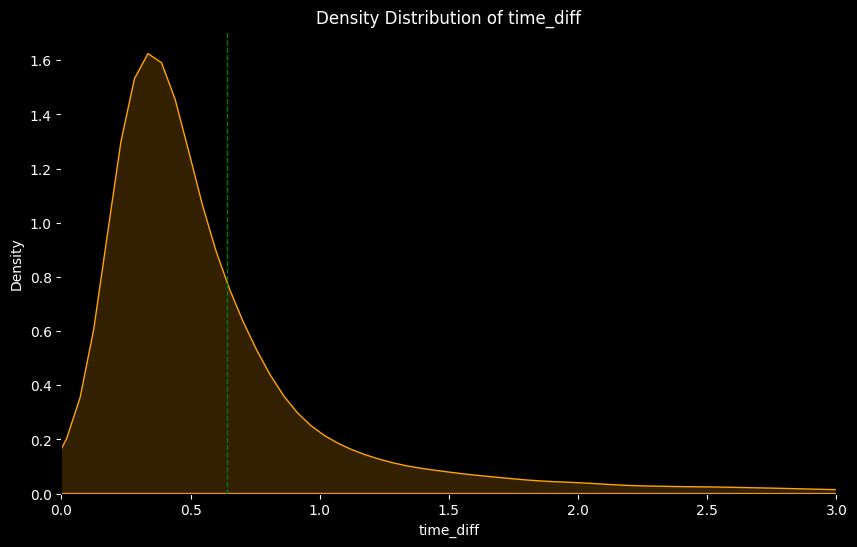

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 밀도 분포 그리기
plt.figure(figsize=(10, 6))
sns.kdeplot(item_check['time_diff'], color='orange', fill=True, alpha=0.2, label='time_diff')

# plt.axvline(ving_ming, color='red', linestyle='dashed', linewidth=1, label='ving_ming')
plt.axvline(wak_speed, color='green', linestyle='dashed', linewidth=1, label='wak')

# 축 및 레이블 설정
plt.xlabel('time_diff', color='white')
plt.ylabel('Density', color='white')
plt.title('Density Distribution of time_diff', color='white')

# 눈금 및 눈금 레이블 색상 변경
plt.tick_params(colors='white', which='both')  # x, y축의 눈금 색상 모두 변경

# X축 범위 설정
plt.xlim(0, 3)
plt.xticks(np.arange(0, 3.5, 0.5))  # 0.5초 간격으로 x축 눈금 설정

# 배경색 설정
ax = plt.gca()
ax.set_facecolor('black')
plt.gcf().set_facecolor('black')

# 그래프 표시
# plt.grid(True)
plt.show()


# wak data (kill,damage,groggy)

램이 딸린다.. 필요한 로그만 저장해놓자.

In [ ]:
# 특정 플레이어 로그 보기
kill_df = df[df['_T'].isin(['LogPlayerKillV2','LogPlayerAttack','LogPlayerTakeDamage','LogPlayerMakeGroggy'])] # 'LogPlayerKillV2','LogPlayerAttack',,'LogItemDrop','LogItemDetach','LogItemAttach','LogItemEquip','LogItemPickup'
cols =             ['matchId','_D','_T',
                  'character.name','character.health','healAmount','weaponId','damageCauserName', # healLog와 관련된 컬럼item.itemId weapon.itemId weaponId isCustomGame gameState.numParticipatedPlayers distance damageCauserName damageReason
                  'attacker.name','attackType','attacker.health','attacker.location.x', 'attacker.location.y','attacker.location.z','damageTypeCategory','damage','weapon.itemId','weapon.stackCount','fireWeaponStackCount', # 공격 하나하나 관련된 로그 (당시 공격한 위치는 나오지 않음, 맞은 경우 나옴)
                  'victim.name','damageReason','victimWeapon','victim.health','victim.location.x', 'victim.location.y','victim.location.z','victimWeaponAdditionalInfo','assists_AccountId','victimGameResult.stats.statTrakDataPairs','victimGameResult.stats.headshotStatTrakDataPairs' ,# 피해를 받은 유저
                  'dBNOMaker.name','dBNODamageInfo.damageReason','dBNODamageInfo.damageTypeCategory','dBNODamageInfo.damageCauserName','dBNODamageInfo.additionalInfo','dBNODamageInfo.distance', # 기절을 만든 유저
                  'finisher.name','finisher.health','finishDamageInfo.damageReason','finishDamageInfo.damageTypeCategory','finishDamageInfo.damageCauserName','finishDamageInfo.additionalInfo','finishDamageInfo.distance', # 마무리 유저?
                  'killer.name','killer.health','killerDamageInfo.damageReason','killerDamageInfo.damageTypeCategory','killerDamageInfo.damageCauserName','killerDamageInfo.additionalInfo',
                  'killer.location.x', 'killer.location.y','killer.location.z','killerDamageInfo.distance',
                  ] # 킬러 유저?

kill_df = kill_df[cols]


damage_gun_df = kill_df[
    ((kill_df['_T'] == 'LogPlayerAttack') & (kill_df['attackType'] == 'Weapon') & (kill_df['weapon.itemId'] != 'Item_Weapon_Apple_C') & (kill_df['weapon.itemId'].notna())) |
    ((kill_df['_T'] == 'LogPlayerTakeDamage') & (kill_df['damageTypeCategory'] == 'Damage_Gun')) |
    ((kill_df['_T'] == 'LogPlayerKillV2') & (kill_df['killerDamageInfo.damageTypeCategory'] == 'Damage_Gun')) |
    ((kill_df['_T'] == 'LogPlayerMakeGroggy') & (kill_df['damageTypeCategory'] == 'Damage_Gun')) # monster_bear
]

player_name = 'wakgood'
cols =  (damage_gun_df['attacker.name'] == player_name) | (damage_gun_df['killer.name'] == player_name) | (damage_gun_df['finisher.name'] == player_name) #| (damage_gun_df['victim.name'] == player_name)
player_df = damage_gun_df[cols]


In [ ]:
# 매핑 함수 정의
def map_weapon_id(row):
    if not pd.isna(row['damageCauserName']) and row['damageCauserName'] in mapping.values():
        for key, value in mapping.items():
            if value == row['damageCauserName']:
                return key
    else:
        return row['weapon.itemId']

# weapon.itemId 열에 매핑된 값을 추가
damage_gun_df['weapon.itemId'] = damage_gun_df.apply(map_weapon_id, axis=1)

<ipython-input-24-4eeefa3ecad7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  damage_gun_df['weapon.itemId'] = damage_gun_df.apply(map_weapon_id, axis=1)


In [ ]:
from scipy.spatial.distance import euclidean

# 거리 계산을 위한 데이터만 선택
coords = damage_gun_df[['attacker.location.x', 'attacker.location.y', 'attacker.location.z',
                        'victim.location.x', 'victim.location.y', 'victim.location.z']] #  'killer.location.x', 'killer.location.y', 'killer.location.z'

# NaN 값이 있는 행 건너뛰고 거리 계산하여 'distance' 열에 추가
damage_gun_df['distance'] = damage_gun_df.apply(lambda row:
                                                euclidean((row['attacker.location.x'], row['attacker.location.y'], row['attacker.location.z']),
                                                          (row['victim.location.x'], row['victim.location.y'], row['victim.location.z'])) / 100
                                                if not row[['attacker.location.x', 'attacker.location.y', 'attacker.location.z',
                                                            'victim.location.x', 'victim.location.y', 'victim.location.z']].isnull().any()
                                                else float('NaN'),
                                                axis=1)

# NaN 값이 있는 행 건너뛰고 killerDamageInfo.distance 값이 음수인 경우에만 거리 계산하여 'kill_distance' 열에 추가
damage_gun_df['killerDamageInfo.distance'] = damage_gun_df['killerDamageInfo.distance'] / 100

KeyboardInterrupt: 

In [ ]:
len(damage_gun_df[damage_gun_df.duplicated(keep=False)])

In [ ]:
# player_df.head(200)
# match_datas 저장
csv_file_path = '/content/drive/MyDrive/PUBG/damage_log_data_all(0705).csv'
damage_gun_df.to_csv(csv_file_path, index=False)

### 최애의 무기 전체 static



In [ ]:
# 총기 장르 추가
weapon_summaries_df['weapon.genre'] = [
    'AR' if item in AR else
    'DMR' if item in DMR else
    'SR' if item in SR else
    'SG' if item in SG else
    'SMG' if item in SMG else
    'LMG' if item in LMG else
    'Special' if item in Special else
    'Unknown'
    for item in weapon_summaries_df['weapon.itemid']
]






In [ ]:
weapon_summaries_df.head()


,XPTotal,LevelCurrent,TierCurrent,Medals,weapon.itemid,StatsTotal.MostDefeatsInAGame,StatsTotal.Defeats,StatsTotal.MostDamagePlayerInAGame,StatsTotal.DamagePlayer,StatsTotal.MostHeadShotsInAGame,StatsTotal.HeadShots,StatsTotal.LongestDefeat,StatsTotal.LongRangeDefeats,StatsTotal.Kills,StatsTotal.MostKillsInAGame,StatsTotal.Groggies,StatsTotal.MostGroggiesInAGame,OfficialStatsTotal.MostDefeatsInAGame,OfficialStatsTotal.Defeats,OfficialStatsTotal.DamagePlayer,OfficialStatsTotal.HeadShots,OfficialStatsTotal.Kills,OfficialStatsTotal.MostKillsInAGame,OfficialStatsTotal.Groggies,OfficialStatsTotal.LongestKill,CompetitiveStatsTotal.MostDefeatsInAGame,CompetitiveStatsTotal.Defeats,CompetitiveStatsTotal.DamagePlayer,CompetitiveStatsTotal.HeadShots,CompetitiveStatsTotal.Kills,CompetitiveStatsTotal.MostKillsInAGame,CompetitiveStatsTotal.Groggies,CompetitiveStatsTotal.LongestKill,weapon.genre
0,120772,26,0,[],Item_Weapon_ACE32_C,0,0,0.000000,0.000000,0,0,0.000000,0,0,0,0,0,0,0,4514,18,34,4,30,120,0,0,0,0,0,0,0,0,AR
1,100327,23,0,[],Item_Weapon_AK47_C,3,28,308.839996,2713.700146,2,11,102.768860,1,24,3,16,2,0,0,1502,6,14,4,11,43,0,0,0,0,0,0,0,0,AR
2,184180,34,0,[],Item_Weapon_AUG_C,0,0,0.000000,0.000000,0,0,0.000000,0,0,0,0,0,0,0,6565,35,50,5,44,84,0,0,0,0,0,0,0,0,AR
3,20675,9,0,[],Item_Weapon_AWM_C,1,1,36.000000,36.000000,0,0,65.100441,0,1,1,0,0,0,0,709,0,4,3,6,196,0,0,0,0,0,0,0,0,SR
4,22431,9,0,[],Item_Weapon_Berreta686_C,1,11,194.071304,1075.150955,1,2,13.197083,0,13,3,8,1,0,0,163,0,0,0,0,0,0,0,0,0,0,0,0,0,SG


In [ ]:
weapon_summaries_df[['weapon.itemid','weapon.genre','XPTotal','LevelCurrent','OfficialStatsTotal.DamagePlayer','OfficialStatsTotal.Groggies','OfficialStatsTotal.Kills']].sort_values(by=['XPTotal'],ascending=False)

# 무기별 정확도 및 데미지

* AR과 SR 를 다르게 봐야한다.


In [ ]:
# 우왁굳님의 kill,damage 로그만 가져오겠습니다.
url1 = '/content/drive/MyDrive/PUBG/damage_log_data_all(06).csv'
url2 = '/content/drive/MyDrive/PUBG/damage_log_data_all(07).csv'
url3 = '/content/drive/MyDrive/PUBG/damage_log_data_all(0705).csv'
df = load_csv_in_chunks(url1)
df2 = load_csv_in_chunks(url2)
df3 = load_csv_in_chunks(url3)

<ipython-input-11-cda891a709b6>:6: DtypeWarning: Columns (30,33) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.concat(chunks)


In [ ]:
all_df = pd.concat([df,df2,df3])


In [ ]:
# prompt: all_df 의중복행 제거해줘

all_df = all_df.drop_duplicates(keep=False)


In [ ]:
# prompt: # player_df 의 중복행인것들만 가져와

print(all_df[all_df.duplicated(keep=False)][['_D']].min())
print(all_df[all_df.duplicated(keep=False)][['_D']].max())

_D    2024-06-13T16:55:18.382Z
dtype: object
_D    2024-07-04T11:48:02.740Z
dtype: object


In [ ]:
WAK_match = ['7cf8ef7e-d6af-4f49-b21d-a0f989f87021',
 'e596fe45-b5b3-47e4-877b-8c41cdcae3a4',
 '3212089f-4a7f-4657-ac3b-7c4a97a54b09']
all_df = all_df[~all_df['matchId'].isin(WAK_match)]

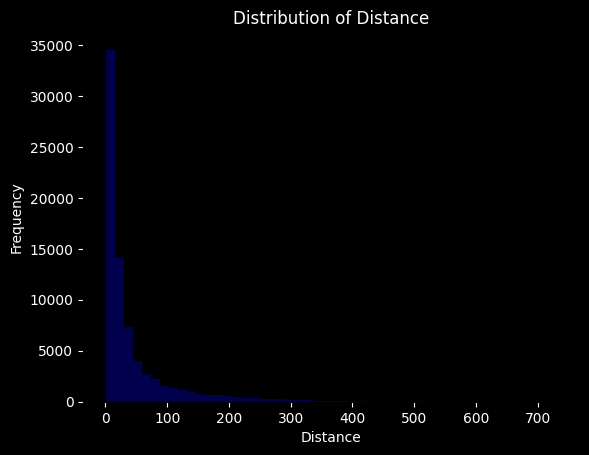

In [ ]:
import matplotlib.pyplot as plt

distance = all_df[all_df['distance'] < 5000]

# 히스토그램 그리기
plt.hist(distance['distance'], bins=50, alpha=0.3, color='blue')

# 축 및 레이블 설정
plt.xlabel('Distance', color='white')
plt.ylabel('Frequency', color='white')
plt.title('Distribution of Distance', color='white')

# 눈금 및 눈금 레이블 색상 변경
plt.tick_params(colors='white', which='both')  # x, y축의 눈금 색상 모두 변경

# plt.grid(True)  # 그리드를 켜려면 주석을 해제하세요
# 배경색 설정
ax = plt.gca()
ax.set_facecolor('black')  # 축 배경색 회색으로 설정
plt.gcf().set_facecolor('black')  # 그림 배경색 회색으로 설정

# plt.grid(True)  # 그리드를 켜려면 주석을 해제하세요
plt.show()

In [ ]:
all_df[['matchId']].nunique()

matchId    85
dtype: int64

In [ ]:
# prompt: all_df['finishDamageInfo.additionalInfo'] 값들을 import ast 해줘

import ast

all_df['finishDamageInfo.additionalInfo'] = all_df['finishDamageInfo.additionalInfo'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [ ]:
all_df[all_df['_T']=='LogPlayerMakeGroggy'].sample(199)

In [ ]:
# prompt: player_df 중복행 제거
all_df.drop_duplicates(inplace=True)


In [ ]:
list_match = player_df['matchId'].unique().tolist()
# ids = [id for id in matchids if id not in list_match]

len(list_match)

81

In [ ]:
# damageReason 값을 더미 변수로 변환, 컬럼으로 피봇하여 여부확인
damage_dummies = pd.get_dummies(all_df['damageReason'])
result_df = pd.concat([all_df, damage_dummies], axis=1)

In [ ]:
result_df.head(100)

In [ ]:
attack_col = ['_D','_T','attacker.name','weapon.itemId','fireWeaponStackCount']
dmg_col = ['_D','_T','damageCauserName','attacker.name', 'damageTypeCategory','damage','weapon.itemId','ArmShot',	'HeadShot',	'LegShot',	'PelvisShot',	'TorsoShot','distance','victim.name'] # NonSpecific'

# 모든 유저에 위 과정을 적용 시키면
# 초단위를 제외한 시간값 추가
result_df['_D'] = pd.to_datetime(result_df['_D']) #.dt.strftime('%Y-%m-%dT%H:%M:%S')

weapon_shot = result_df[result_df['_T'] == 'LogPlayerAttack'][attack_col]
weapon_shot = weapon_shot.groupby(['attacker.name',pd.Grouper(key='_D', freq='5S'),'weapon.itemId']).agg(
    shot = pd.NamedAgg(column='_T',aggfunc='count')
).reset_index()


weapon_hit = result_df[result_df['_T'] == 'LogPlayerTakeDamage'][dmg_col]
weapon_hit = weapon_hit.groupby(['attacker.name',pd.Grouper(key='_D', freq='5S'),'weapon.itemId','victim.name']).agg(
    hit = pd.NamedAgg(column='_T',aggfunc='count'),
    distanceMean = pd.NamedAgg(column='distance',aggfunc='mean'),
    ArmShot = pd.NamedAgg(column='ArmShot',aggfunc='sum'),
    HeadShot = pd.NamedAgg(column='HeadShot',aggfunc='sum'),
    LegShot = pd.NamedAgg(column='LegShot',aggfunc='sum'),
    PelvisShot = pd.NamedAgg(column='PelvisShot',aggfunc='sum'),
    TorsoShot = pd.NamedAgg(column='TorsoShot',aggfunc='sum'),
    # NonSpecific = pd.NamedAgg(column='NonSpecific', aggfunc='sum'),
    damage = pd.NamedAgg(column='damage',aggfunc='sum')
).reset_index()

# shot을 기준으로 merge 해야한다.
merged_df = pd.merge(weapon_shot, weapon_hit,
                    left_on=['attacker.name', '_D','weapon.itemId'],
                    right_on=['attacker.name', '_D','weapon.itemId'],
                    how='left')


In [ ]:
merged_df[['hit','ArmShot','HeadShot',	'LegShot',	'PelvisShot',	'TorsoShot','damage']] = merged_df[['hit','ArmShot','HeadShot',	'LegShot',	'PelvisShot',	'TorsoShot','damage']].fillna(0).astype(int)

# 총기 장르 추가
merged_df['weapon.genre'] = [
    'AR' if item in AR else
    'DMR' if item in DMR else
    'SR' if item in SR else
    'SG' if item in SG else
    'SMG' if item in SMG else
    'LMG' if item in LMG else
    'Special' if item in Special else
    'Unknown'
    for item in merged_df['weapon.itemId']
]
# 정확도 계산
col = ['weapon.genre','weapon.itemId','shot','hit','distanceMean','distance_category','ratio']
merged_df['ratio'] = merged_df['hit']*100 / merged_df['shot']
merged_df['miss'] = merged_df['shot'] - merged_df['hit']
merged_df[['ratio','distanceMean']] = merged_df[['ratio','distanceMean']].fillna(0).astype(int)


In [ ]:
print(merged_df['_D'].min())
print(merged_df['_D'].max())

2024-06-13 16:54:40+00:00
2024-07-04 11:51:50+00:00


In [ ]:
mer

In [ ]:
# # match_datas 저장
# csv_file_path = '/content/drive/MyDrive/PUBG/wak_gun_static06.csv'
# merged_df.to_csv(csv_file_path, index=False)

In [ ]:
test=merged_df.groupby(['weapon.itemId']).agg(
    shot = pd.NamedAgg(column='shot',aggfunc='sum'),
    hit = pd.NamedAgg(column='hit',aggfunc='sum'),
)

test.sort_values(by=['shot'],ascending=False)

### content1. 최애의 무기는? ABOUT AR

In [ ]:
# AR 기준
# 범주형 컬럼 생성
bins = [i for i in range(0, 50, 10)] + [float('inf')]
labels = [f'{i}~{i+10}' for i in range(0, 40, 10)] + ['40 이상']
# 범주형 컬럼 생성
merged_df['distance_category'] = pd.cut(merged_df['distanceMean'], bins=bins, labels=labels, right=False)

In [ ]:
# 5초동안 shot을 5번이상한 경우
AR_df = merged_df[
    (merged_df['distanceMean'] > 0) &
    (merged_df['distanceMean'] < 300) &
    (merged_df['shot'] > 9) &
    (merged_df['weapon.genre'] =='AR') &
    (merged_df['weapon.itemId'].isin(['Item_Weapon_HK416_C','Item_Weapon_AUG_C','Item_Weapon_ACE32_C']))
    ]# [col] #shot_1000m #


player = merged_df[merged_df['attacker.name'] == 'wakgood']
player_AR = player[
    (player['distanceMean'] > 0) &
    (player['distanceMean'] < 300) &
    (player['shot'] > 9) &
    (player['weapon.genre'] =='AR') &
    (player['weapon.itemId'].isin(['Item_Weapon_HK416_C','Item_Weapon_AUG_C','Item_Weapon_ACE32_C']))
    ]


In [ ]:
len(player_AR)

103

In [ ]:

# 범주형 컬럼 생성
bins = [0, 30] + [i for i in range(40, 110, 10)] + [float('inf')]
labels =  ['30 미만'] + [f'{i}~{i+10}' for i in range(30, 100, 10)] + ['100 이상']

player_sr = player[
    (player['hit'] > 0) &
    (player['distanceMean'] < 1000) &
    (player['weapon.genre'] =='DMR')
    ]

player_sr['distance_category'] = pd.cut(player_sr['distanceMean'], bins=bins, labels=labels, right=False)
player_sr

In [ ]:
# 1초동안 5번이상 SHOT했을때, 총기들의 거리별 정확도
AR_hit_df = AR_df.groupby(['weapon.itemId','distance_category']).agg(

                        HeadShot = pd.NamedAgg(column='HeadShot', aggfunc='sum'),
                        ArmShot = pd.NamedAgg(column='ArmShot', aggfunc='sum'),
                        LegShot = pd.NamedAgg(column='LegShot', aggfunc='sum'),
                        PelvisShot = pd.NamedAgg(column='PelvisShot', aggfunc='sum'),
                        TorsoShot = pd.NamedAgg(column='TorsoShot', aggfunc='sum'),
                        shot = pd.NamedAgg(column='shot',aggfunc='sum'),
                        hit = pd.NamedAgg(column='hit',aggfunc='sum'),
                        ratio = pd.NamedAgg(column='ratio', aggfunc='mean'),

                        ).reset_index()
# 1초동안 5번이상 SHOT했을때, 총기들의 거리별 정확도
player_AR_hit_df = player_AR.groupby(['weapon.itemId','distance_category']).agg(

                        HeadShot = pd.NamedAgg(column='HeadShot', aggfunc='sum'),
                        ArmShot = pd.NamedAgg(column='ArmShot', aggfunc='sum'),
                        LegShot = pd.NamedAgg(column='LegShot', aggfunc='sum'),
                        PelvisShot = pd.NamedAgg(column='PelvisShot', aggfunc='sum'),
                        TorsoShot = pd.NamedAgg(column='TorsoShot', aggfunc='sum'),
                        shot = pd.NamedAgg(column='shot',aggfunc='sum'),
                        hit = pd.NamedAgg(column='hit',aggfunc='sum'),
                        ratio = pd.NamedAgg(column='ratio', aggfunc='mean'),

                        ).reset_index()

In [ ]:
player_AR_hit_df

,weapon.itemId,distance_category,HeadShot,ArmShot,LegShot,PelvisShot,TorsoShot,shot,hit,ratio
0,Item_Weapon_ACE32_C,0~10,2,3,0,1,15,45,21,35.000000
1,Item_Weapon_ACE32_C,10~20,3,3,8,2,16,112,32,26.857143
2,Item_Weapon_ACE32_C,20~30,1,3,16,4,17,206,41,20.250000
3,Item_Weapon_ACE32_C,30~40,0,5,7,7,17,108,36,31.333333
4,Item_Weapon_ACE32_C,40 이상,1,1,4,2,1,54,9,16.000000
5,Item_Weapon_AUG_C,0~10,0,1,0,0,4,16,5,31.000000
6,Item_Weapon_AUG_C,10~20,6,7,11,3,30,193,57,34.800000
7,Item_Weapon_AUG_C,20~30,7,8,18,6,40,276,79,28.800000
8,Item_Weapon_AUG_C,30~40,1,3,5,4,18,166,31,18.222222
9,Item_Weapon_AUG_C,40 이상,2,3,7,0,8,135,20,17.666667


In [ ]:
# prompt: AR_hit_df 를 pivot 해줘 weapon.itemId 컬럼을 컬럼으로, 행은 distance_category , 값은 ratio

pivot = AR_hit_df.pivot_table(index='distance_category', columns='weapon.itemId', values='ratio')
pivot


weapon.itemId,Item_Weapon_ACE32_C,Item_Weapon_AUG_C,Item_Weapon_HK416_C
distance_category,,,
0~10,32.907960,27.156740,31.993976
10~20,22.813411,23.584775,22.269461
20~30,19.937294,19.590226,21.789855
30~40,17.560606,17.078431,14.724299
40 이상,10.240793,11.132432,11.345815


# 탄착군 형성


In [ ]:
import random

# 부위별 좌표 랜덤생성

hit_locations = {
    'HeadShot': [(40, 75, 240, 280)],
    'TorsoShot':[(30, 85, 175, 240)] ,
    'ArmShot': [(0,30,230,140),(90,120,230,140)],
    'PelvisShot': [(30,90,150,175)],
    'LegShot': [(30,90,10, 150)],
    'miss' : [(0, 20, 10, 120),
        (95, 120, 10, 120),
        (80, 120, 250, 300),
        (0, 40, 250, 300),
        ]

}
def generate_random_coordinates(hit_location_ranges):
    x1, x2, y1, y2 = hit_location_ranges
    x = random.uniform(x1, x2)
    y = random.uniform(y1, y2)
    return {'x': x, 'y': y}

def calculate_coordinates(row):
    coordinates = []
    for hit_type, ranges in hit_locations.items():
        num_hits = row[hit_type]
        for _ in range(num_hits):
            range_tuple = random.choice(ranges)  # 여러 범위 중 무작위로 하나 선택
            coord = generate_random_coordinates(range_tuple)
            coordinates.append(coord)
    return coordinates

# Apply calculate_coordinates function to each row in the DataFrame
AR_df['hit_coordinates'] = AR_df.apply(calculate_coordinates, axis=1)

<ipython-input-18-7be733f492e7>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AR_df['hit_coordinates'] = AR_df.apply(calculate_coordinates, axis=1)


In [ ]:
AR_df.head()

,attacker.name,_D,weapon.itemId,shot,victim.name,hit,distanceMean,ArmShot,HeadShot,LegShot,PelvisShot,TorsoShot,damage,weapon.genre,ratio,miss,distance_category,hit_coordinates
35,001jqr,2024-06-28 14:33:05+00:00,Item_Weapon_ACE32_C,23,AkepNrmSR,8,4,0,1,1,0,6,99,AR,34,15,0~10,"[{'x': 65.57308273477773, 'y': 249.17612248458..."
40,001jqr,2024-06-28 14:34:15+00:00,Item_Weapon_ACE32_C,14,AkepNrmSR,3,8,1,0,0,0,2,79,AR,21,11,0~10,"[{'x': 45.7308720539758, 'y': 177.767775831607..."
70,007haogegeg,2024-06-20 18:01:30+00:00,Item_Weapon_HK416_C,22,ludatiancai,5,54,2,0,1,1,1,74,AR,22,17,40 이상,"[{'x': 82.8585444129827, 'y': 210.574205363894..."
71,007haogegeg,2024-06-20 18:01:30+00:00,Item_Weapon_HK416_C,22,ssseessss,4,32,0,0,3,0,1,80,AR,18,18,30~40,"[{'x': 57.23315515844307, 'y': 207.03702950696..."
72,007haogegeg,2024-06-20 18:01:55+00:00,Item_Weapon_HK416_C,16,ssseessss,3,25,0,1,0,0,2,78,AR,18,13,20~30,"[{'x': 68.39167462305937, 'y': 242.52441701527..."


In [ ]:
# 랜덤 생성된 좌표들의 차이를 구한다음 평균을 구한다. -> 반동지표

def calculate_recoil(row):
    recoil_values = []
    prev_x = None
    prev_y = None
    for coord in row['hit_coordinates']:
        x = coord['x']
        y = coord['y']
        if prev_x is not None and prev_y is not None:
            # Calculate Euclidean distance between consecutive shots
            recoil = np.sqrt((x - prev_x)**2 + (y - prev_y)**2)
            recoil_values.append(recoil)
        prev_x = x
        prev_y = y
    # Return mean recoil value
    if recoil_values:
        return np.mean(recoil_values)
    else:
        return np.nan

    return recoil_values

AR_df['recoil'] = AR_df.apply(calculate_recoil, axis=1)


<ipython-input-20-54b5f36b37f5>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AR_df['recoil'] = AR_df.apply(calculate_recoil, axis=1)


In [ ]:
AR_df.head()

<ipython-input-51-c70d8325c380>:27: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc = ax.scatter(x_data, y_data, alpha=1, s=15, edgecolors='none',marker='x')


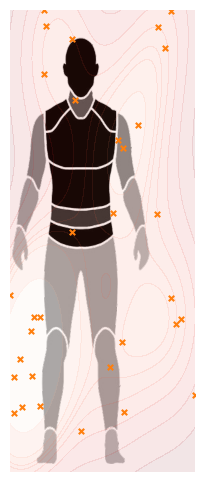

In [ ]:
import seaborn as sns
# 지도 이미지 추가
map_path = "/content/hitbox.png"
img = Image.open(map_path)

def death_spot2(df):
    x_data = []
    y_data = []
    for coords_list in df['hit_coordinates']:
        for coord in coords_list:
            x_data.append(coord['x'])
            y_data.append(coord['y'])

    # 그래프 그리기
    fig, ax = plt.subplots(figsize=(6, 6))
    # Set x and y limits
    ax.set_xlim([0, 120])
    ax.set_ylim([0, 300])
    plt.axis('off')

    ax.imshow(img, extent=[0, 120, 0, 300])  # Uncomment this line if you have an image to overlay

    # Seaborn의 kdeplot으로 음영 추가
    sns.kdeplot(x=x_data, y=y_data, shade=True, cmap='Reds_r', ax=ax, alpha=0.1)

    # matploltlib 산점도로 표시
    sc = ax.scatter(x_data, y_data, alpha=1, s=15, edgecolors='none',marker='x')

    plt.show()

# player.head(1)
# 함수 호출
death_spot2(player.head(2))

In [ ]:
player[player['distanceMean'] < 10 ].groupby(['weapon.itemId']).agg(
    recoil = pd.NamedAgg(column='recoil',aggfunc='mean')
)

,recoil
weapon.itemId,
Item_Weapon_ACE32_C,90.559057
Item_Weapon_AUG_C,126.380084
Item_Weapon_HK416_C,117.993516


### 총기별 반동 지표 분포

In [ ]:
player = AR_df[AR_df['attacker.name'] =='wakgood']
player_aug = player[(player['weapon.itemId'] == 'Item_Weapon_AUG_C') & (player['distanceMean']<20)][['recoil']].mean()
player_aug

recoil    110.915225
dtype: float64

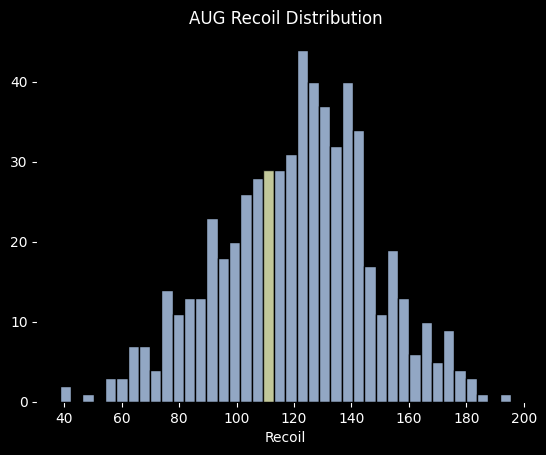

In [ ]:
import matplotlib.pyplot as plt

# 20m 미만 + 어그
aug = AR_df[(AR_df['weapon.itemId'] == 'Item_Weapon_AUG_C') & (AR_df['distanceMean'] < 20)]
player_aug = player[(player['weapon.itemId'] == 'Item_Weapon_AUG_C') & (player['distanceMean'] < 20)][['recoil']].mean()

# sns.histplot(aug['recoil'], bins=40, kde=True, color='blue', edgecolor='white', label='aug', alpha=0.3)

# 전체 히스토그램 그리기
counts, bins, patches = plt.hist(aug['recoil'], bins=40, alpha=1, color='#92A7C4', edgecolor='black', label='aug')
# player_aug_mean 부분 색상 변경
for patch, left, right in zip(patches, bins[:-1], bins[1:]):
    if left <= player_aug['recoil'] < right:
        patch.set_facecolor('#F4FBC2')
        patch.set_alpha(0.8)


# 축 및 레이블 설정
plt.xlabel('Recoil', color='white')
plt.title('AUG Recoil Distribution', color='white')

# 눈금 및 눈금 레이블 색상 변경
plt.tick_params(colors='white', which='both')  # x, y축의 눈금 색상 모두 변경
# plt.grid(True)  # 그리드를 켜려면 주석을 해제하세요

# 배경색 설정
ax = plt.gca()
ax.set_facecolor('black')  # 축 배경색 회색으로 설정
plt.gcf().set_facecolor('black')  # 그림 배경색 회색으로 설정

plt.show()

In [ ]:
aug = player[(player['weapon.itemId'] == 'Item_Weapon_AUG_C') & (player['distanceMean'] < 16)]['recoil'].mean().round()
ace = player[(player['weapon.itemId'] == 'Item_Weapon_ACE32_C') & (player['distanceMean'] < 16)]['recoil'].mean().round()
m4 = player[(player['weapon.itemId'] == 'Item_Weapon_HK416_C') & (player['distanceMean'] < 16)]['recoil'].mean().round()

print(aug)
print(ace)
print(m4)


119.0
119.0
114.0


# 생존력과 관련된 지표


# 운과 생존력에 관련된 지표
* 풀파밍이 완성되는 시간 (무기 + 풀파츠 + 드링크, 치유템 3개 이상)  
* 3렙 가방, 3렙 조끼, 보급 item 획득 횟수
* 자기장 위치
* 고지대에 적이 있는 경우

In [186]:
wak1 = '/content/drive/MyDrive/PUBG/player_df_07.csv'
wak2 = '/content/drive/MyDrive/PUBG/player_df_0705.csv'
wak3 = '/content/drive/MyDrive/PUBG/player_df_06.csv'

df = load_csv_in_chunks(wak2)

<ipython-input-3-1e0d51e1e203>:124: DtypeWarning: Columns (0,4,38,40,41,44,45,46,47,48,49,50,52,53,54,56,57,58,65,66,67,100,102,103,104,105,107,108,109,110,114,115,117,118,126,127,128,129,130,131,135,136,137,138,139,141,142,143,160,161,162,163,164,172,173,174,175,176,177,178,179,180,182,183,191,192,193,194,195,196,197,198,199,201,202,210,211,212,213,214,215,216,217,218,220,223,224,232,233,234,235,236,237,238,242,243,246,247,255,256,257,258,259,262,266,267) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.concat(chunks)


## 파츠에 관련된 운

In [ ]:
df['matchId'].unique()

In [ ]:
sample = df[df['matchId'] == 'b1b37930-f734-429b-8a01-38fe0d6ddda2']
farming = sample[sample['_T'].isin(['LogItemDrop','LogItemDetach','LogItemAttach','LogItemEquip','LogItemPickup'])][farming_col]
attack = sample[sample['_T'].isin(['LogPlayerKillV2','LogPlayerAttack','LogPlayerTakeDamage','LogPlayerMakeGroggy'])]


In [ ]:
# prompt: weapon.itemId	weapon.stackCount	weapon.category	weapon.subCategory	weapon.attachedItems	isLedgeGrab	objectType	objectTypeStatus	objectTypeAdditionalInfo  위컬럼이 nan 이 아닌 경우를 가져와줘 'or'

result = sample[sample['parentItem.stackCount'].notna() | sample['childItem.stackCount'].notna() ] #| sample['weapon.category'].notna() | sample['weapon.subCategory'].notna() | sample['weapon.attachedItems'].notna() | sample['isLedgeGrab'].notna() | sample['objectType'].notna() | sample['objectTypeStatus'].notna() | sample['objectTypeAdditionalInfo'].notna()]


item을 attach 하고 detach 할 때, 장착 정보가 나온다!!

In [ ]:
attach_col = ['_D', '_T','matchId','character.name', "item.itemId"	,"item.stackCount",	"item.category",
              'parentItem.itemId',  'parentItem.category', 'parentItem.subCategory', 'parentItem.attachedItems','childItem.itemId']
              # 'childItem.itemId', 'childItem.stackCount', 'childItem.category', 'childItem.subCategory', 'childItem.attachedItems']


Use
> 아래의 치유 아이템이 2개 이상인 경우 파밍완료

* Item_Heal_FirstAid_C : 구급상자
* Item_Boost_PainKiller_C : 진통제
* Item_Boost_EnergyDrink_C : 에너지드링크
* Item_Weapon_FlashBang_C : 섬광
* Item_Weapon_SmokeBomb_C : 연막탄

In [ ]:
pickup = sample[sample['_T'].isin(['LogItemPickup']) & (sample['character.name'] == 'wakgood')][attach_col]
pickup['item.itemId'] = pickup['item.itemId'].map(attach_mapping).fillna(pickup['item.itemId'])
test = pickup[pickup['item.category'] =='Attachment']


# 총기 장르 추가
test['attach.genre'] = [
    'Upper' if item in Upper else
    'Muzzle' if item in Muzzle else
    'Magazine' if item in Magazine else
    'SideRail' if item in SideRail else
    'Lower' if item in Lower else
    'Stock' if item in Stock else
    'Unknown'
    for item in test[test['item.category'] == 'Attachment']['item.itemId']
]

# attach.groupby(['item.itemId','item.category']).agg({'item.stackCount':'sum','_D':'max'})

Attach

* AR 의 parentItem.attachedItems 파츠가 4개 이상인 경우 파밍완료
* SR 의 파츠가 3개 이상인 경우 파밍완료

In [ ]:
attach = sample[sample['_T'].isin(['LogItemAttach']) & (sample['character.name'] == 'wakgood')][attach_col]
attach['parentItem.attachedItems'] = attach['parentItem.attachedItems'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
attach['parentItem.attachedItems'] = attach['parentItem.attachedItems'].apply(lambda x: [attach_mapping[item] if item in attach_mapping else item for item in x])
attach['childItem.itemId'] = attach['childItem.itemId'].map(attach_mapping).fillna(attach['childItem.itemId'])
attach['parentItem.cnt'] = attach['parentItem.attachedItems'].apply(lambda x: len(x))
attach

정리
* farming_df 아이템을 줍고, 장착한 데이터
* LogItemPickup - 사용 아이템 집계
* LogItemAttach - weapon 과 파츠 아이템 집계


attach 테이블과 pickup 테이블을 각 경기와 유저별로 집계하고 합쳐줄까?

In [ ]:
farm_df = farming_df[farming_df['_T'].isin(['LogItemPickup','LogItemAttach'])]
farm_df['_D'] = pd.to_datetime(farm_df['_D'])
farm_df['parentItem.attachedItems'] = farm_df['parentItem.attachedItems'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

farm_df['parentItem.cnt'] = farm_df['parentItem.attachedItems'].apply(lambda x: len(x) if (isinstance(x, list) or isinstance(x, tuple)) else 0)
farm_df['childItem.cnt'] = farm_df['childItem.itemId'].apply(lambda x: 1 if (isinstance(x, str)) else 0)

farm_df['attach_cnt'] = farm_df['parentItem.cnt'] + farm_df['childItem.cnt']

attach = farm_df[(farm_df['_T'] == 'LogItemAttach')]
pickup = farm_df[(farm_df['_T'] == 'LogItemPickup')]

In [ ]:
farm_df[farm_df['character.name'] == 'lll-lll--'].head(100)

In [ ]:
# (farm_df['_T'] == 'LogItemAttach')
wak = farm_df[(farm_df['character.name'] == 'wakgood') & (farm_df['matchId'] == '17026713-c19b-4852-ac37-d5e9c2e42ea9')] # farming_df['_T'].isin(['LogItemAttach'])

# 총기 장르 추가
farm_df['weapon.genre'] = [
    'AR' if item in AR else
    'DMR' if item in DMR else
    'SR' if item in SR else
    'SG' if item in SG else
    'SMG' if item in SMG else
    'LMG' if item in LMG else
    'Special' if item in Special else
    'Unknown'
    for item in farm_df['parentItem.itemId']
]



 # [attach_col+['parentItem.cnt','weapon.genre']]

<ipython-input-38-23634a548981>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farm_df['weapon.genre'] = [


In [ ]:
wak[wak['_T'] == 'LogItemAttach'] #[wak['matchId'] == '0b6c1c52-84a7-4291-ad1c-9ddc7d55ef96']

In [ ]:
grouped = farm_df.groupby(['matchId','character.name'])

def farming_speed(group):
    group = group.sort_values('_D')  # 타임스탬프 기준으로 정렬
    start_t = group['_D'].min() # 아이템을 줍는 시작 시점

    AR_parts_T = group[group['attach_cnt'] == 5]['_D'].min()   # 각유저의 부착물 cnt 가 4개 이상이 완성되는 시점
    SR_DMR_parts_t = group[group['attach_cnt'] == 4]['_D'].min()   # 각유저의 부착물 cnt 가 3개 이상이 완성되는 시점

    if group['weapon.genre'].iloc[0] == 'AR':
      group = group[group['_D'] == AR_parts_T]
    elif group['weapon.genre'].iloc[0] in ['DMR', 'SR']:
      group = group[group['_D'] == SR_DMR_parts_t]

    group['time_diff'] = group['_D'] - start_t
    group['time_diff'] = group['time_diff'].dt.total_seconds()

    return group

# 각 그룹에 대해 함수 적용하여 필터링
parts_farm_T = grouped.apply(farming_speed).reset_index(drop=True)[['matchId','_D','_T','character.name','weapon.genre','item.itemId','item.category','parentItem.itemId',
                                                                     'parentItem.attachedItems','childItem.itemId','attach_cnt','time_diff']]


일단 파츠가 완성되는 시간 그래프

In [ ]:
parts_farm_T[parts_farm_T['character.name']=='wakgood'].head(100)

In [ ]:
AR_parts = parts_farm_T[parts_farm_T['weapon.genre'] == 'AR'].groupby(['matchId','character.name','weapon.genre','attach_cnt']).agg(
    time_diff_min = pd.NamedAgg(column='time_diff',aggfunc='min'),
).reset_index()

DMSR_parts = parts_farm_T[parts_farm_T['weapon.genre'].isin(['DMR','SR'])].groupby(['matchId','character.name','weapon.genre','attach_cnt']).agg(
    time_diff_min = pd.NamedAgg(column='time_diff',aggfunc='min'),
).reset_index()


In [ ]:
AR_parts = AR_parts[(AR_parts['attach_cnt'] == 5 )]
SDMR_parts = DMSR_parts[(DMSR_parts['attach_cnt'] == 4 )]

w_AR_parts = AR_parts[AR_parts['character.name'] == 'wakgood']['time_diff_min'].mean()
w_SDMR_parts = SDMR_parts[SDMR_parts['character.name'] == 'wakgood']['time_diff_min'].mean()

ar_max = AR_parts[AR_parts['character.name'] == 'wakgood']['time_diff_min'].max()
ar_min = AR_parts[AR_parts['character.name'] == 'wakgood']['time_diff_min'].min()
ar_std = AR_parts[AR_parts['character.name'] == 'wakgood']['time_diff_min'].std()

sdmr_max = SDMR_parts[SDMR_parts['character.name'] == 'wakgood']['time_diff_min'].max()
sdmr_min = SDMR_parts[SDMR_parts['character.name'] == 'wakgood']['time_diff_min'].min()
sdmr_std = SDMR_parts[SDMR_parts['character.name'] == 'wakgood']['time_diff_min'].std()



In [ ]:
parts = parts_farm_T[parts_farm_T['character.name'] == 'wakgood'].groupby(['matchId','character.name','weapon.genre','attach_cnt']).agg(
    time_diff_min = pd.NamedAgg(column='time_diff',aggfunc='min'),
).reset_index()
parts

In [ ]:
AR_parts.sort_values(by=['time_diff_min'],ascending=True)

# print(w_AR_parts)
# print(ar_min)
# print(ar_max)

# # print(w_SDMR_parts)
# print(sdmr_max)
# print(sdmr_min)


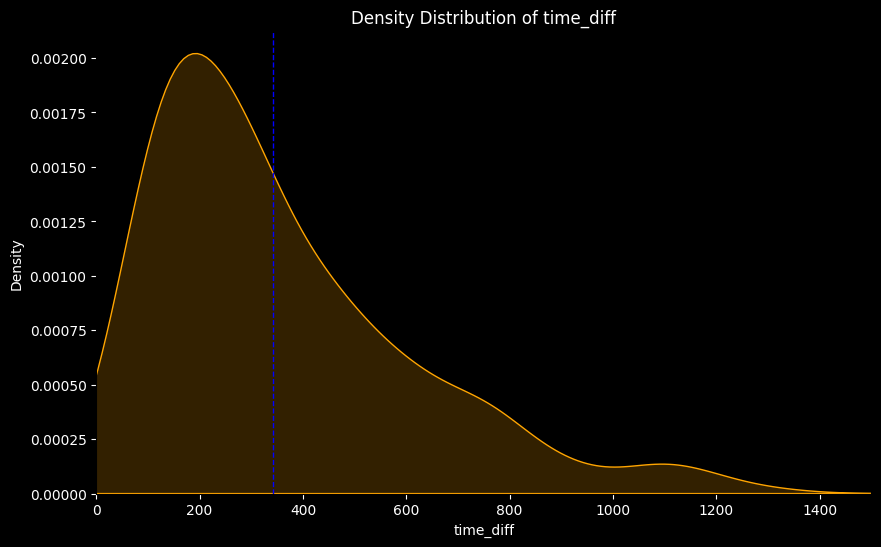

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 밀도 분포 그리기
plt.figure(figsize=(10, 6))
sns.kdeplot(AR_parts['time_diff_min'], color='orange', fill=True, alpha=0.2, label='time_diff')
# sns.kdeplot(SDMR_parts['time_diff_min'], color='blue', fill=True, alpha=0.2, label='time_diff')

# plt.axvline(w_SDMR_parts, color='green', linestyle='dashed', linewidth=1, label='wak')
plt.axvline(w_AR_parts, color='blue', linestyle='dashed', linewidth=1, label='wak')

# 축 및 레이블 설정
plt.xlabel('time_diff', color='white')
plt.ylabel('Density', color='white')
plt.title('Density Distribution of time_diff', color='white')

# 눈금 및 눈금 레이블 색상 변경
plt.tick_params(colors='white', which='both')  # x, y축의 눈금 색상 모두 변경

# X축 범위 설정
plt.xlim(0, 1500)
# plt.xticks(np.arange(0, 3.5, 0.5))  # 0.5초 간격으로 x축 눈금 설정

# 배경색 설정
ax = plt.gca()
ax.set_facecolor('black')
plt.gcf().set_facecolor('black')

# 그래프 표시
# plt.grid(True)
plt.show()


## 자기장과 고지대 파악

자기장 운빨
* 자기장이 바뀔 때, 자기장 중심과의 거리 차이가 어느정도 되는지
* 자기장 안에서 자기장 밖의 적에게 죽은 경우


이미 적이 있어!
* 고지대에 있는 적에게 죽은 경우
* 문을 열고 들어갔는데 적이 있는 경우
* 양각

In [ ]:
col = pd.DataFrame(df.columns)
df[['_T']].value_counts()

Baltic_Main 에란겔을 ㅣㄱ준으로가자

In [187]:
# 왁굳님의 경기중 6페이지 이상 살아남은 경기를 걸러야한다.
# 07 데이터 경기 중

wak_login = df[(df['_T'] == 'LogPlayerLogout') & (df['accountId']=='account.c2824509f5a64692bdbd999c8c981a59') |
           (df['_T'] == 'LogPlayerLogin') & (df['accountId']=='account.c2824509f5a64692bdbd999c8c981a59')][['_D','matchId','MapName','_T','character.name']]

wak_login['_D'] = pd.to_datetime(wak_login['_D'])

group = wak_login.groupby(['matchId','MapName']).agg(
    survivorTime = pd.NamedAgg(column='_D',aggfunc=lambda x: x.diff().dt.total_seconds().sum())
).reset_index()



In [188]:
wak_07_suvivor = group[(group['survivorTime'] > 400)]['matchId'].tolist()
wak_07_suvivor

['3212089f-4a7f-4657-ac3b-7c4a97a54b09',
 '41da4633-9558-41fa-bc4e-4e789d4131d6',
 '5200e3e0-05bb-48bc-8eba-98dc6c408d5f',
 'ddef6c26-e51b-440c-8084-0b8a7b89adcc',
 'e68748a4-177b-48d3-bf80-4a961c23803e']

* 자기장 패턴ㅍㅏ악

In [ ]:
df[df['_T'] =='LogPlayerKillV2'].head()

# LogPlayerPosition   # character.location.x	character.location.y	character.location.z character.isInBlueZone character.zone elapsedTime
# LogPlayerKILLv2 #
# LogVehicleRide # vehicle.vehicleType	vehicle.vehicleId	vehicle.seatIndex

In [ ]:
zone_df = df[(df['_T'] == 'LogGameStatePeriodic') & (df['matchId'] == '0b6c1c52-84a7-4291-ad1c-9ddc7d55ef96')].sort_values(by=['_D'])[['_T','_D','matchId','MapName','gameState.safetyZonePosition.x','gameState.safetyZonePosition.y' ,'gameState.safetyZonePosition.z','gameState.safetyZoneRadius']]
zone_df

In [ ]:
zone_df['_D'] = pd.to_datetime(zone_df['_D'])
r=zone_df.groupby(['gameState.safetyZoneRadius']).agg(
    count = pd.NamedAgg(column='gameState.safetyZoneRadius',aggfunc='count'),
    next_time = pd.NamedAgg(column='_D',aggfunc=lambda x: x.diff().dt.total_seconds().sum()) # 안전지역이 유지되는 시간, 100 이라면 100초 이후에 다음 자기장이 정해진것
).reset_index().sort_values(by=['gameState.safetyZoneRadius'],ascending=False)



* 그렇다면 자기장 운을 파악하는데 필요한 컬럼은 ?


'_T' = 'LogGameStatePeriodic'

'gameState.safetyZonePosition.x',	'gameState.safetyZonePosition.y',	'gameState.safetyZoneRadius'

'_T' = 'LogPlayerPosition',

'character.name' , 'character.location.x', 'character.location.y',	'character.location.z' ,'character.isInBlueZone', 'character.zone', 'elapsedTime'

_T =' LogPlayerKILLV2


                  'victim.name','damageReason','victimWeapon','victim.health','victim.location.x', 'victim.location.y','victim.location.z','victimWeaponAdditionalInfo','assists_AccountId','victimGameResult.stats.statTrakDataPairs','victimGameResult.stats.headshotStatTrakDataPairs' ,# 피해를 받은 유저
                  'dBNOMaker.name','dBNODamageInfo.damageReason','dBNODamageInfo.damageTypeCategory','dBNODamageInfo.damageCauserName','dBNODamageInfo.additionalInfo','dBNODamageInfo.distance', # 기절을 만든 유저
                  'finisher.name','finisher.health','finishDamageInfo.damageReason','finishDamageInfo.damageTypeCategory','finishDamageInfo.damageCauserName','finishDamageInfo.additionalInfo','finishDamageInfo.distance', # 마무리 유저?
                  'killer.name','killer.health','killerDamageInfo.damageReason','killerDamageInfo.damageTypeCategory','killerDamageInfo.damageCauserName','killerDamageInfo.additionalInfo',
                  'killer.location.x', 'killer.location.y','killer.location.z','killerDamageInfo.distance',




In [189]:
# 데이터 총 정리

col = ['matchId','MapName','_D','_T', 'character.name' , 'character.location.x', 'character.location.y', 'character.location.z' ,'character.isInBlueZone', 'character.zone', 'elapsedTime',
       'gameState.safetyZonePosition.x', 'gameState.safetyZonePosition.y', 'gameState.safetyZoneRadius',
        'victim.name','damageReason','victimWeapon','victim.health','victim.location.x', 'victim.location.y','victim.location.z','victim.isInBlueZone', # 피해를 받은 유저
        'dBNOMaker.name','dBNODamageInfo.damageReason','dBNODamageInfo.damageTypeCategory','dBNODamageInfo.damageCauserName','dBNODamageInfo.additionalInfo','dBNODamageInfo.distance','dBNOMaker.isInBlueZone', # 기절을 만든 유저
        'killer.name','killer.health','killerDamageInfo.damageReason','killerDamageInfo.damageTypeCategory','killerDamageInfo.damageCauserName','killerDamageInfo.additionalInfo',
        'killer.location.x', 'killer.location.y','killer.location.z','killerDamageInfo.distance', 'killer.isInBlueZone']

bluezone_df = df[df['matchId'].isin(wak_07_suvivor) & df['_T'].isin(['LogPlayerKillV2','LogPlayerPosition','LogGameStatePeriodic'])][col]


In [190]:
bluezone_df['matchId'].nunique()

5

* 에란겔 등고선 이미지
https://gall.dcinside.com/mgallery/board/view/?id=blueholegame&no=148022

In [191]:
# match_datas 저장
csv_file_path = '/content/drive/MyDrive/PUBG/bluezone_df(0705).csv'
bluezone_df.to_csv(csv_file_path, index=False)

### 자기장 운을 확인하기 위한 에란겔 dataframe

In [192]:
wak1 = '/content/drive/MyDrive/PUBG/bluezone_df(06).csv'
wak2 = '/content/drive/MyDrive/PUBG/bluezone_df(07).csv'
wak3 = '/content/drive/MyDrive/PUBG/bluezone_df(0705).csv'

df1 = load_csv_in_chunks(wak1)
df2 = load_csv_in_chunks(wak2)
df3 = load_csv_in_chunks(wak3)

df  = pd.concat([df1,df2,df3])

In [193]:
df = df.drop_duplicates(keep=False)

* 각 페이즈 별로 자기장의 중심과의 거리


In [194]:
df['_D'] = pd.to_datetime(df['_D'])


In [195]:
zone_df = df[(df['_T'] == 'LogGameStatePeriodic')].sort_values(by=['_D'])[['_T','_D','matchId','MapName','gameState.safetyZonePosition.x','gameState.safetyZonePosition.y' ,'gameState.safetyZoneRadius']]

zone_df['_D'] = pd.to_datetime(zone_df['_D'])
zone_df = zone_df.groupby(['matchId','gameState.safetyZonePosition.x','gameState.safetyZonePosition.y','gameState.safetyZoneRadius']).agg(
    _D = pd.NamedAgg(column='_D',aggfunc = 'min'), # 다음 자기장이 정해지는 시간
    count = pd.NamedAgg(column='gameState.safetyZoneRadius',aggfunc='count'),
    during_time = pd.NamedAgg(column='_D',aggfunc=lambda x: x.diff().dt.total_seconds().sum()),# 안전지역이 유지되는 시간, 100 이라면 100초 이후에 다음 자기장이 정해진것
    ).reset_index().sort_values(by=['matchId','gameState.safetyZoneRadius'],ascending=False)


zone_df = zone_df[zone_df['count']> 3]
zone_df['page'] = zone_df.groupby('matchId')['gameState.safetyZoneRadius'].rank(method='dense', ascending=False).astype('int')


In [196]:
# zone_df = zone_df[zone_df['page'] > 0]
zone_df['next_blueZoneRadius'] = zone_df.groupby('matchId')['gameState.safetyZoneRadius'].shift(-1)
zone_df['next_blueZone.x'] = zone_df.groupby('matchId')['gameState.safetyZonePosition.x'].shift(-1)
zone_df['next_blueZone.y'] = zone_df.groupby('matchId')['gameState.safetyZonePosition.y'].shift(-1)

zd = zone_df[['matchId','_D','gameState.safetyZoneRadius','page','next_blueZoneRadius','next_blueZone.x','next_blueZone.y']]



In [197]:
# 자기장이 좁혀졌을 때 새로운 자기장이나오고, 이 때 유저의 위치를 구하면된다.

position_col = ['matchId','MapName','_D','_T', 'character.name' , 'character.location.x', 'character.location.y', 'character.location.z' ,'character.isInBlueZone', 'character.zone', 'elapsedTime']
bluzone_col = ['gameState.safetyZonePosition.x','gameState.safetyZonePosition.y' ,'gameState.safetyZoneRadius']
player_position = df[(df['_T'] == 'LogPlayerPosition') & (df['character.name'] == 'wakgood') | (df['_T'] == 'LogGameStatePeriodic')].sort_values(by=['_D'])[position_col + bluzone_col]
test = pd.merge(player_position, zd,on=['matchId','_D','gameState.safetyZoneRadius'],how='left')


In [198]:
# prompt: gameState.safetyZonePosition.x	gameState.safetyZonePosition.y	gameState.safetyZoneRadius	page	next_blueZoneRadius	next_blueZone.x	next_blueZone.y	lag.character.location.x	lag.character.location.y	lag.character.location.z  를 리스트로

col_list = ['matchId','MapName','_D',
'lag.character.location.x',
'lag.character.location.y',
'lag.character.location.z',
'page',
'next_blueZoneRadius',
'next_blueZone.x',
'next_blueZone.y',
]


In [199]:
test['lag.character.location.x'] = test.groupby('matchId')['character.location.x'].shift(-1)
test['lag.character.location.y'] = test.groupby('matchId')['character.location.y'].shift(-1)
test['lag.character.location.z'] = test.groupby('matchId')['character.location.z'].shift(-1)


In [ ]:
# 330 초 이후에 2차 자기장 영역쪽으로 블루존이 좁혀진다.


In [200]:
wak_position = test[test['page'] > 1][col_list]
# 각 블루존에 대해 캐릭터가 블루존 안에 있는지 여부 계산
is_in_bluezone = []

for index, row in wak_position.iterrows():
    character_x = row['lag.character.location.x']
    character_y = row['lag.character.location.y']
    bluezone_x = row['next_blueZone.x']
    bluezone_y = row['next_blueZone.y']
    bluezone_radius = row['next_blueZoneRadius']

    # 캐릭터와 블루존 중심 간의 거리 계산
    distance_to_center = np.sqrt((bluezone_x - character_x)**2 + (bluezone_y - character_y)**2)

    # 블루존 안에 있는지 여부 확인
    if distance_to_center <= bluezone_radius:
        is_in_bluezone.append(True)
    else:
        is_in_bluezone.append(False)

# 결과 출력
wak_position['is_in_zone'] = is_in_bluezone


In [202]:
# 현재 페이지가 2 이고, 다음 블루존(3) 의 위치와, 현재 유저의 위치, 그리고 다음 자기장의 위치가 나왔을 때, 왁굳님이 안전영역안에 들어왔는지
t = wak_position[['matchId','MapName','page','next_blueZone.x','next_blueZone.y','next_blueZoneRadius','lag.character.location.x','lag.character.location.y','is_in_zone']]#[:5].reset_index()
t

,matchId,MapName,page,next_blueZone.x,next_blueZone.y,next_blueZoneRadius,lag.character.location.x,lag.character.location.y,is_in_zone
127,706c3a32-0f84-4c47-bb30-5156106eaecb,Baltic_Main,2.0,323689.750000,533220.875000,111595.843750,413298.031250,481715.375000,True
169,706c3a32-0f84-4c47-bb30-5156106eaecb,Baltic_Main,3.0,320064.406250,520259.250000,66957.507812,372208.812500,493039.687500,True
205,706c3a32-0f84-4c47-bb30-5156106eaecb,Baltic_Main,4.0,323168.375000,527622.875000,36826.628906,351026.593750,519599.375000,True
241,706c3a32-0f84-4c47-bb30-5156106eaecb,Baltic_Main,5.0,330165.593750,511178.406250,18413.314453,350805.718750,519389.281250,False
273,706c3a32-0f84-4c47-bb30-5156106eaecb,Baltic_Main,6.0,325860.125000,508595.000000,9206.657227,353155.156250,516087.968750,False
289,706c3a32-0f84-4c47-bb30-5156106eaecb,Baltic_Main,7.0,324567.281250,508837.343750,4603.328613,NaN,NaN,False
299,706c3a32-0f84-4c47-bb30-5156106eaecb,Baltic_Main,8.0,NaN,NaN,NaN,NaN,NaN,False
435,20e42870-1e20-4369-b4eb-8863b48d9fe2,Baltic_Main,2.0,613845.437500,312551.968750,111595.843750,560505.937500,176001.234375,False
477,20e42870-1e20-4369-b4eb-8863b48d9fe2,Baltic_Main,3.0,588476.812500,318199.500000,66957.507812,608916.562500,263637.750000,True
513,20e42870-1e20-4369-b4eb-8863b48d9fe2,Baltic_Main,4.0,572604.000000,306926.031250,36826.628906,630617.250000,306490.156250,False


* 한경기를 시각화하면 다음과같음

자기장이 줄어 들었을 때, 이미 안전영역에 들어 간 경우는 총 3번

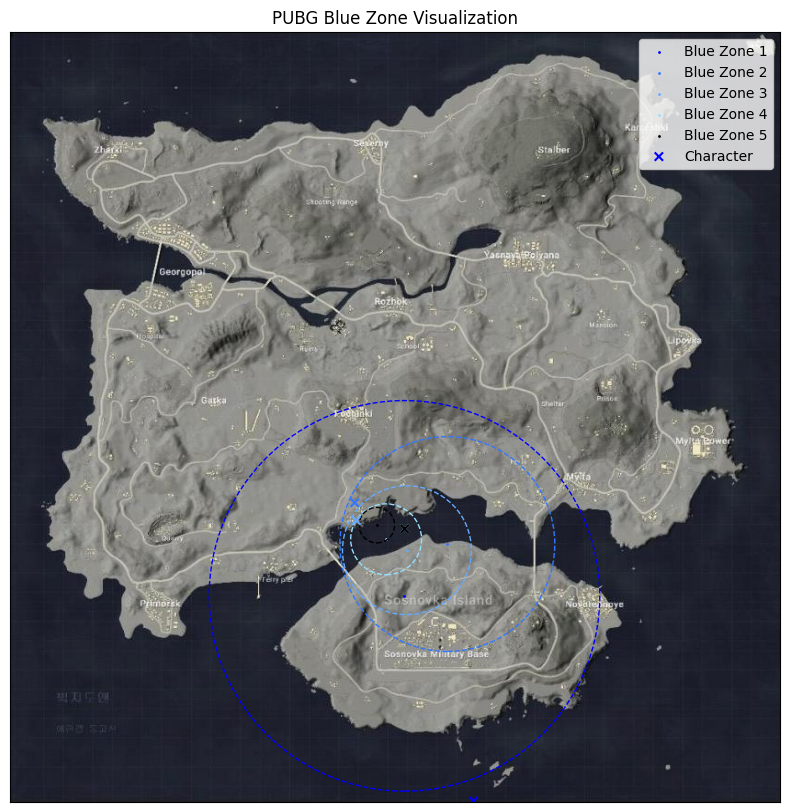

In [175]:
from matplotlib.patches import Circle

map_image_path = '/content/에란겔.jpg'
img = Image.open(map_image_path)

# 시각화
fig, ax = plt.subplots(figsize=(10, 10))  # 그래프 크기를 키움
ax.set_aspect('equal')

# 지도 이미지 추가
ax.imshow(img, extent=[0, 800000, 0, 800000])

# 블루존 원 그리기
colors = ['#0000FF', '#3377FF', '#66AAFF', '#99DDFF','black']
for i in range(len(t['next_blueZoneRadius'])):
    circle = Circle((t['next_blueZone.x'][i], t['next_blueZone.y'][i]),
                    t['next_blueZoneRadius'][i],
                    color=colors[i], fill=False, linestyle='--')
    ax.add_patch(circle)
    plt.scatter(t['next_blueZone.x'][i], t['next_blueZone.y'][i], color=colors[i], label=f'Blue Zone {i+1}',s=1)


plt.scatter(t['lag.character.location.x'], t['lag.character.location.y'], color=colors, marker='x', label='Character')

# 범례와 축 설정
plt.legend()
plt.xlim(0, 800000)
plt.ylim(0, 800000)
ax.set_xticks([])  # x축 라벨 제거
ax.set_yticks([])  # y축 라벨 제거
plt.title('PUBG Blue Zone Visualization')

# 그래프 표시
plt.show()
